# COGS 108 - EDA Checkpoint

# Names

- Abdalla Atalla
- Che-Yu Hou
- Jason Wong
- Tsun Wai Siu
- William Chai

<a id='research_question'></a>
# Research Question

In the United States of America, is there a relationship between the consumer age and their consumption of avocados? More specifically, does younger populations consume more avocados than older populations or vice versa.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

import statsmodels.api as sm
import patsy

sns.set(font_scale=2, style="white")
%config InlineBackend.figure_format = 'retina'

In [2]:
sales2018 = pd.read_csv('https://raw.githubusercontent.com/COGS108/group049_wi21/main/Hass%20Sales%20Data%20in%20USA%202018.csv?token=ALZLNVPHP5PN77LEMTZAE33AIBKN2')
sales2019 = pd.read_csv('https://raw.githubusercontent.com/COGS108/group049_wi21/main/Hass%20Sales%20Data%20in%20USA%202019.csv?token=ALZLNVLR62S3IMPMCZ6HO53AIBKUO')
sales2020 = pd.read_csv('https://raw.githubusercontent.com/COGS108/group049_wi21/main/Hass%20Sales%20Data%20in%20USA%202020.csv?token=ALZLNVMDXXLSIEZPYPLTQATAIBKWU')
population = pd.read_csv('https://raw.githubusercontent.com/COGS108/group049_wi21/main/City%20Population%20by%20Age%20by%20US%20Census%202019.csv?token=ALZLNVORBRMTVUL646L32ELAIB7VQ')

# vol2018 = pd.read_csv('https://raw.githubusercontent.com/COGS108/group049_wi21/main/Hass%20Volume%20Data%202018.csv?token=ALZLNVJXOJ27QI5BCQH6XLDAIBKZC')
# vol2019 = pd.read_csv('https://raw.githubusercontent.com/COGS108/group049_wi21/main/Hass%20Volume%20Data%202019.csv?token=ALZLNVOND6JZLFY4QRDSNK3AIBK4Q')
# vol2020 = pd.read_csv('https://raw.githubusercontent.com/COGS108/group049_wi21/main/Hass%20Volume%20Data%202020.csv?token=ALZLNVKBSAE5LQIT643Q52DAIBNW6')

# Dataset (s)

Dataset Name: United States Census Population by Age 2019 <br>
Link to the dataset: https://data.census.gov/cedsci/table?g=1600000US0455000,0644000,0664000,0666000,0667000,0820000,1235000,1245000,1253000,1271000,1304000,1608830,1714000,1836003,2148000,2255000,2507000,2622000,2634000,2965000,3240000,3601000,3651000,3673000,3712000,3755000,3918000,4159000,4260000,4261000,4819000,4835000,5157000,5168000,5363000,5367000&tid=ACSST5Y2019.S0101&moe=false&hidePreview=true <br>
Number of observations: 35 <br>
This data is gathered by the United States Census Bureau in 2019. The United States Census is collected and compiled every 10 years. The data set represents various cities’ population, broken down by age groups. We only downloaded data from cities that we have data on their avocado sales. <br>
<br>
Dataset Name: Avocado Category Data <br>
Link to the dataset: https://hassavocadoboard.com/category-data/<br>
Number of observations: 16092<br>
This data is gathered from the Hass Avocado Board and compiled into a dataset. The data set represents weekly retail sales data for small, large, and extra large Hass avocados in volume and price from 2015-2018. Hass Avocado Board describes retail as “grocery, mass, club, drug, dollar, and military [stores]”.<br>


# Data Cleaning

We first take a look at our sales dataset.

In [3]:
sales2018.head()

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units
0,Albany,Weekly,2018-01-01 00:00:00,Conventional,1.47,113514.42,2622.70,101135.53,20.25,9735.94,5556.98,4178.96,0.00
1,Atlanta,Weekly,2018-01-01 00:00:00,Conventional,0.95,649352.59,341061.46,41818.27,961.18,265511.68,173990.02,88882.27,2639.39
2,Baltimore/Washington,Weekly,2018-01-01 00:00:00,Conventional,1.15,849487.62,66628.66,519460.20,4920.46,258478.30,245665.84,12812.46,0.00
3,Boise,Weekly,2018-01-01 00:00:00,Conventional,1.13,79646.97,38196.44,1706.22,6263.00,33481.31,28764.84,4676.67,39.80
4,Boston,Weekly,2018-01-01 00:00:00,Conventional,1.40,419696.59,9622.52,325398.02,2061.91,82614.14,65868.23,16745.91,0.00


We are not interested in 'Timeframe', as we already knew our data is reported weekly. We are also dropping 'Total Bulk and Bags Units', 'SmlBagged Units','LrgBagged Units','X-LrgBagged Units', and 'TotalBagged Units' because we have 'ASP' which stands for the average price of a single avocado. Since there is no way to tell how many avocados are in a bag or bulk unit, we will not be using those columns.

In [4]:
sales2018 = sales2018.drop(['Timeframe','Total Bulk and Bags Units','SmlBagged Units','LrgBagged Units','X-LrgBagged Units','TotalBagged Units'],axis=1)
sales2018.head()

,Geography,Current Year Week Ending,Type,ASP Current Year,4046 Units,4225 Units,4770 Units
0,Albany,2018-01-01 00:00:00,Conventional,1.47,2622.70,101135.53,20.25
1,Atlanta,2018-01-01 00:00:00,Conventional,0.95,341061.46,41818.27,961.18
2,Baltimore/Washington,2018-01-01 00:00:00,Conventional,1.15,66628.66,519460.20,4920.46
3,Boise,2018-01-01 00:00:00,Conventional,1.13,38196.44,1706.22,6263.00
4,Boston,2018-01-01 00:00:00,Conventional,1.40,9622.52,325398.02,2061.91


Now that we had dropped all the columns we do not need for this project. We continue to look for values that need cleaning. Since we know this dataframe represents sales data for 2018, then '2018' under 'Current Year Week Ending' is redundant and shall be dropped. 'Current Year Week Ending' also contains a generic timestamp '00:00:00', which we will be dropping as well. We decided to keep our 'Current Year Week Ending' in M/D format, we wrote a function to change the date format as shown in code below. We also decided to change column name to make it more concise.

In [5]:
def standardizeDat(var):
    var = var.replace('2018-','').replace('-','/').replace(':','')
    month = var.split('/',1)[0]
    date = var.split('/',1)[1]
    
    if(month != '10'):
        month = month.replace('0','')
    if(date != '10' or date != '20' or date != '30'):
        date = date.replace('0','')
    string = month+ '/'+ date
    return string.strip()

def standardizeType(string):
    string = string.strip()
    return string
    
sales2018['Type'] = sales2018['Type'].apply(standardizeType)
sales2018['Current Year Week Ending'] = sales2018['Current Year Week Ending'].apply(standardizeDat)
sales2018 = sales2018.rename(columns={'Current Year Week Ending': "Week Ending"})
sales2018 = sales2018.rename(columns={'Geography': "City"})
sales2018 = sales2018.rename(columns={'ASP Current Year': "Average Price Per Unit"})

sales2018['Total Sales ($)'] = (sales2018['4046 Units'] + sales2018['4225 Units'] + sales2018['4770 Units']) * sales2018['Average Price Per Unit']


sales2018.head()


,City,Week Ending,Type,Average Price Per Unit,4046 Units,4225 Units,4770 Units,Total Sales ($)
0,Albany,1/1,Conventional,1.47,2622.70,101135.53,20.25,152554.3656
1,Atlanta,1/1,Conventional,0.95,341061.46,41818.27,961.18,364648.8645
2,Baltimore/Washington,1/1,Conventional,1.15,66628.66,519460.20,4920.46,679660.7180
3,Boise,1/1,Conventional,1.13,38196.44,1706.22,6263.00,52167.1958
4,Boston,1/1,Conventional,1.40,9622.52,325398.02,2061.91,471915.4300


We repeat the cleaning process for sales2019 and sales2020. We first take a look at sales2019.

In [6]:
sales2019.head() 

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units
0,Total U.S.,Weekly,1/7/2019 0:00,Conventional,1.02,44749707.48,14377053.08,11890232.90,893721.10,17588700.40,12829493.40,4617813.55,141393.45
1,Albany,Weekly,1/7/2019 0:00,Conventional,1.07,129222.29,3789.30,112635.18,158.00,12639.81,8877.95,3761.86,0.00
2,Atlanta,Weekly,1/7/2019 0:00,Conventional,0.92,828971.15,388574.98,38902.85,3482.04,398011.28,299475.26,98477.41,58.61
3,Baltimore/Washington,Weekly,1/7/2019 0:00,Conventional,1.31,925391.38,102652.85,530128.43,8212.94,284397.16,263150.78,21233.05,13.33
4,Boise,Weekly,1/7/2019 0:00,Conventional,1.23,108261.98,43723.19,7085.86,14435.46,43017.47,23932.54,19049.95,34.98


We drop the same columns as we did for sales2018, format change column 'Current Year Week Ending' to 'Week Ending', and format it date to keep it uniform throughout the project.

In [7]:
def standardizeDate(string):
    var = string.split(' ', 1)[0]
    var = var.split('/')
    var = var[0]+'/'+var[1]
    return var.strip()


    
sales2019['Type'] = sales2019['Type'].apply(standardizeType)
sales2019 = sales2019.drop(['Timeframe','Total Bulk and Bags Units','SmlBagged Units','LrgBagged Units','X-LrgBagged Units','TotalBagged Units'],axis=1)
sales2019['Current Year Week Ending'] = sales2019['Current Year Week Ending'].apply(standardizeDate)
sales2019 = sales2019.rename(columns={'Current Year Week Ending': "Week Ending"})
sales2019 = sales2019.rename(columns={'Geography': "City"})
sales2019 = sales2019.rename(columns={'ASP Current Year': "Average Price Per Unit"})

sales2019['Total Sales ($)'] = (sales2019['4046 Units'] + sales2019['4225 Units'] + sales2019['4770 Units']) * sales2019['Average Price Per Unit']


sales2019.head()

,City,Week Ending,Type,Average Price Per Unit,4046 Units,4225 Units,4770 Units,Total Sales ($)
0,Total U.S.,1/7,Conventional,1.02,14377053.08,11890232.90,893721.10,2.770423e+07
1,Albany,1/7,Conventional,1.07,3789.30,112635.18,158.00,1.247433e+05
2,Atlanta,1/7,Conventional,0.92,388574.98,38902.85,3482.04,3.964831e+05
3,Baltimore/Washington,1/7,Conventional,1.31,102652.85,530128.43,8212.94,8.397024e+05
4,Boise,1/7,Conventional,1.23,43723.19,7085.86,14435.46,8.025075e+04


In [8]:
sales2020.head()

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units
0,Albany,Weekly,1/6/2020 0:00,Conventional,0.92,185688.43,4038.61,163629.86,193.31,17826.65,7098.37,9384.95,1343.33
1,Atlanta,Weekly,1/6/2020 0:00,Conventional,0.89,812755.45,355460.73,37303.12,2905.78,417085.82,371318.63,45627.67,139.52
2,Baltimore/Washington,Weekly,1/6/2020 0:00,Conventional,1.13,1040583.36,120288.69,522244.65,6213.88,391836.14,239052.24,152663.90,120.00
3,Boise,Weekly,1/6/2020 0:00,Conventional,1.09,121921.10,35816.52,8749.59,1834.52,75520.47,39530.82,31962.59,4027.06
4,Boston,Weekly,1/6/2020 0:00,Conventional,1.18,762475.92,11242.17,494342.34,1486.19,255405.22,110420.12,144661.77,323.33


In [9]:
sales2020 = sales2020.drop(['Timeframe','Total Bulk and Bags Units','SmlBagged Units','LrgBagged Units','X-LrgBagged Units','TotalBagged Units'],axis=1)
sales2020['Type'] = sales2020['Type'].apply(standardizeType)
sales2020['Current Year Week Ending'] = sales2020['Current Year Week Ending'].apply(standardizeDate)
sales2020 = sales2020.rename(columns={'Current Year Week Ending': "Week Ending"})
sales2020 = sales2020.rename(columns={'Geography': "City"})
sales2020 = sales2020.rename(columns={'ASP Current Year': "Average Price Per Unit"})

sales2020['Total Sales ($)'] = (sales2020['4046 Units'] + sales2020['4225 Units'] + sales2020['4770 Units']) * sales2020['Average Price Per Unit']

sales2020.head()

,City,Week Ending,Type,Average Price Per Unit,4046 Units,4225 Units,4770 Units,Total Sales ($)
0,Albany,1/6,Conventional,0.92,4038.61,163629.86,193.31,154432.8376
1,Atlanta,1/6,Conventional,0.89,355460.73,37303.12,2905.78,352145.9707
2,Baltimore/Washington,1/6,Conventional,1.13,120288.69,522244.65,6213.88,733084.3586
3,Boise,1/6,Conventional,1.09,35816.52,8749.59,1834.52,50576.6867
4,Boston,1/6,Conventional,1.18,11242.17,494342.34,1486.19,598343.4260


In [10]:
# def standardizeDate2(string):
#     string = string.split(',', 1)[0]
#     string = string.replace('Jan','1')
#     string = string.replace('Feb','2')
#     string = string.replace('Mar','3')
#     string = string.replace('Apr','4')
#     string = string.replace('May','5')
#     string = string.replace('Jun','6')
#     string = string.replace('Jul','7')
#     string = string.replace('Aug','8')
#     string = string.replace('Sep','9')
#     string = string.replace('Oct','10')
#     string = string.replace('Nov','11')
#     string = string.replace('Dec','12')
#     string = string.replace(' ', '/')
#     return string.strip()

# vol2019 = vol2019.drop(['Year','Status'],axis=1)
# vol2019['Week'] = vol2019['Week'].apply(standardizeDate2)
# vol2019.head()

We now take a look at our population dataframe.

In [11]:
population.head()

,City,State,Total population,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over,Median age (years),Sex ratio (males per 100 females),Age dependency ratio,Old-age dependency ratio,Child dependency ratio
0,Albany city,New York,"97,478","5,622","4,667","4,431","8,570","15,224","8,261","7,448",...,"3,925","3,032","1,885","1,620","2,139",30.9,88.3,44.2,18.6,25.6
1,Atlanta city,Georgia,"488,800","26,577","27,559","22,290","32,902","48,054","55,760","46,168",...,"18,172","14,829","9,696","6,821","6,780",33.3,94.3,42.4,16.4,26.0
2,Boise City city,Idaho,"226,115","12,985","13,588","14,017","15,230","17,016","18,194","17,110",...,"11,677","7,313","4,825","3,629","4,054",36.6,99.3,55.6,21.7,33.9
3,Boston city,Massachusetts,"684,379","34,485","28,298","28,621","48,283","70,917","94,816","72,051",...,"25,139","20,019","13,703","9,116","10,884",32.2,92.3,37.8,15.9,22.0
4,Charlotte city,North Carolina,"857,425","57,891","56,536","56,238","53,321","60,169","79,999","74,831",...,"31,485","23,228","13,825","9,771","9,431",34.2,92.5,51.3,15.5,35.8


In [12]:
population.dtypes

City                                  object
State                                 object
Total population                      object
Under 5 years                         object
5 to 9 years                          object
10 to 14 years                        object
15 to 19 years                        object
20 to 24 years                        object
25 to 29 years                        object
30 to 34 years                        object
35 to 39 years                        object
40 to 44 years                        object
45 to 49 years                        object
50 to 54 years                        object
55 to 59 years                        object
60 to 64 years                        object
65 to 69 years                        object
70 to 74 years                        object
75 to 79 years                        object
80 to 84 years                        object
85 years and over                     object
Median age (years)                   float64
Sex ratio 

As we can see after we ran population.dtypes, many of our data have incorrect data type. We would like the population to be represented by integer data type instead of object type. We also noticed that there is an unnecessary word 'city' that follows each city name, thus we will be dropping those using function "standardizeCity" we have created.

In [13]:
def standardizeCity(string):
    string = string.replace('city',"")
    string = string.strip()
    return string

def stripBalance(string):
    string = string.replace('(balance)',"")
    string = string.strip()
    return string

population = population.drop(['Age dependency ratio','Old-age dependency ratio','Child dependency ratio'],axis=1)

population['City'] = population['City'].apply(standardizeCity)
population['City'] = population['City'].apply(stripBalance)
population['Total population'] = (pd.to_numeric(population['Total population'].str.replace(',',''), errors='coerce')).astype(int)
population['Under 5 years'] = (pd.to_numeric(population['Under 5 years'].str.replace(',',''), errors='coerce')).astype(int)
population['5 to 9 years'] = (pd.to_numeric(population['5 to 9 years'].str.replace(',',''), errors='coerce')).astype(int)
population['10 to 14 years'] = (pd.to_numeric(population['10 to 14 years'].str.replace(',',''), errors='coerce')).astype(int)
population['15 to 19 years'] = (pd.to_numeric(population['15 to 19 years'].str.replace(',',''), errors='coerce')).astype(int)
population['20 to 24 years'] = (pd.to_numeric(population['20 to 24 years'].str.replace(',',''), errors='coerce')).astype(int)
population['25 to 29 years'] = (pd.to_numeric(population['25 to 29 years'].str.replace(',',''), errors='coerce')).astype(int)
population['30 to 34 years'] = (pd.to_numeric(population['30 to 34 years'].str.replace(',',''), errors='coerce')).astype(int)
population['35 to 39 years'] = (pd.to_numeric(population['35 to 39 years'].str.replace(',',''), errors='coerce')).astype(int)
population['40 to 44 years'] = (pd.to_numeric(population['40 to 44 years'].str.replace(',',''), errors='coerce')).astype(int)
population['45 to 49 years'] = (pd.to_numeric(population['45 to 49 years'].str.replace(',',''), errors='coerce')).astype(int)
population['50 to 54 years'] = (pd.to_numeric(population['50 to 54 years'].str.replace(',',''), errors='coerce')).astype(int)
population['55 to 59 years'] = (pd.to_numeric(population['55 to 59 years'].str.replace(',',''), errors='coerce')).astype(int)
population['60 to 64 years'] = (pd.to_numeric(population['60 to 64 years'].str.replace(',',''), errors='coerce')).astype(int)
population['65 to 69 years'] = (pd.to_numeric(population['65 to 69 years'].str.replace(',',''), errors='coerce')).astype(int)
population['70 to 74 years'] = (pd.to_numeric(population['70 to 74 years'].str.replace(',',''), errors='coerce')).astype(int)
population['75 to 79 years'] = (pd.to_numeric(population['75 to 79 years'].str.replace(',',''), errors='coerce')).astype(int)
population['80 to 84 years'] = (pd.to_numeric(population['80 to 84 years'].str.replace(',',''), errors='coerce')).astype(int)
population['85 years and over'] = (pd.to_numeric(population['85 years and over'].str.replace(',',''), errors='coerce')).astype(int)

population.head()


,City,State,Total population,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over,Median age (years),Sex ratio (males per 100 females)
0,Albany,New York,97478,5622,4667,4431,8570,15224,8261,7448,...,5467,5059,5020,3925,3032,1885,1620,2139,30.9,88.3
1,Atlanta,Georgia,488800,26577,27559,22290,32902,48054,55760,46168,...,27719,26051,21839,18172,14829,9696,6821,6780,33.3,94.3
2,Boise City,Idaho,226115,12985,13588,14017,15230,17016,18194,17110,...,13722,14088,13080,11677,7313,4825,3629,4054,36.6,99.3
3,Boston,Massachusetts,684379,34485,28298,28621,48283,70917,94816,72051,...,37588,36690,31914,25139,20019,13703,9116,10884,32.2,92.3
4,Charlotte,North Carolina,857425,57891,56536,56238,53321,60169,79999,74831,...,53923,49587,41950,31485,23228,13825,9771,9431,34.2,92.5


After inspecting our dataset 'Population', we found that there are cities in 'sales2018', 'sales2019', and 'sales2020' that we do not have data for in dataset 'Population'. Therefore, we will be dropping the cities from the sales dataset.

In [14]:
dataF = sales2018
indexNames = dataF[
    (dataF['City']=='Louisville') | 
    (dataF['City']=='Total U.S.') |
    (dataF['City']=='Baltimore/Washington') | 
    (dataF['City']=='Buffalo/Rochester') |
    (dataF['City']=='California') |
    (dataF['City']=='Cincinnati/Dayton') |
    (dataF['City']=='Great Lakes') |
    (dataF['City']=='Harrisburg/Scranton') |
    (dataF['City']=='Hartford/Springfield') |
    (dataF['City']=='Midsouth') |
    (dataF['City']=='Nashville') |
    (dataF['City']=='Northeast') |
    (dataF['City']=='Northern New England') |
    (dataF['City']=='Plains') |
    (dataF['City']=='South Carolina') |
    (dataF['City']=='South Central') |
    (dataF['City']=='Southeast') |
    (dataF['City']=='West') |
    (dataF['City']=='West Tex/New Mexico')
].index

sales2018.drop(indexNames, inplace = True)
sales2018 = sales2018.reset_index().drop(columns='index')

dataF = sales2019
indexNames = dataF[
    (dataF['City']=='Louisville') | 
    (dataF['City']=='Total U.S.') |
    (dataF['City']=='Baltimore/Washington') | 
    (dataF['City']=='Buffalo/Rochester') |
    (dataF['City']=='California') |
    (dataF['City']=='Cincinnati/Dayton') |
    (dataF['City']=='Great Lakes') |
    (dataF['City']=='Harrisburg/Scranton') |
    (dataF['City']=='Hartford/Springfield') |
    (dataF['City']=='Midsouth') |
    (dataF['City']=='Nashville') |
    (dataF['City']=='Northeast') |
    (dataF['City']=='Northern New England') |
    (dataF['City']=='Plains') |
    (dataF['City']=='South Carolina') |
    (dataF['City']=='South Central') |
    (dataF['City']=='Southeast') |
    (dataF['City']=='West') |
    (dataF['City']=='West Tex/New Mexico')
].index

sales2019.drop(indexNames, inplace = True)
sales2019 = sales2019.reset_index().drop(columns='index')


dataF = sales2020
indexNames = dataF[
    (dataF['City']=='Louisville') | 
    (dataF['City']=='Total U.S.') |
    (dataF['City']=='Baltimore/Washington') | 
    (dataF['City']=='Buffalo/Rochester') |
    (dataF['City']=='California') |
    (dataF['City']=='Cincinnati/Dayton') |
    (dataF['City']=='Great Lakes') |
    (dataF['City']=='Harrisburg/Scranton') |
    (dataF['City']=='Hartford/Springfield') |
    (dataF['City']=='Midsouth') |
    (dataF['City']=='Nashville') |
    (dataF['City']=='Northeast') |
    (dataF['City']=='Northern New England') |
    (dataF['City']=='Plains') |
    (dataF['City']=='South Carolina') |
    (dataF['City']=='South Central') |
    (dataF['City']=='Southeast') |
    (dataF['City']=='West') |
    (dataF['City']=='West Tex/New Mexico')
].index

sales2020.drop(indexNames, inplace = True)
sales2020 = sales2020.reset_index().drop(columns='index')

We also notice some of the cities included vicinity cities. Here, we will take the city which we have the data for in population.

In [15]:
def standardizeSalesCity(string):
    string = string.replace('Richmond/Norfolk',"Norfolk")
    string = string.replace('Raleigh/Greensboro',"Raleigh")
    string = string.replace('New Orleans/Mobile',"New Orleans")
    string = string.replace('Dallas/Ft. Worth',"Dallas")
    string = string.replace('Miami/Ft. Lauderdale',"Miami")
    string = string.replace('Phoenix/Tucson',"Phoenix")
    string = string.replace('Boise',"Boise City")
    string = string.strip()
    return string

sales2018['City'] = sales2018['City'].apply(standardizeSalesCity)
sales2019['City'] = sales2019['City'].apply(standardizeSalesCity)
sales2020['City'] = sales2020['City'].apply(standardizeSalesCity)

# Data Analysis & Results (EDA)

We like to see the distribution of population's median age of the cities that we observed.  

In [16]:
population.head()

,City,State,Total population,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over,Median age (years),Sex ratio (males per 100 females)
0,Albany,New York,97478,5622,4667,4431,8570,15224,8261,7448,...,5467,5059,5020,3925,3032,1885,1620,2139,30.9,88.3
1,Atlanta,Georgia,488800,26577,27559,22290,32902,48054,55760,46168,...,27719,26051,21839,18172,14829,9696,6821,6780,33.3,94.3
2,Boise City,Idaho,226115,12985,13588,14017,15230,17016,18194,17110,...,13722,14088,13080,11677,7313,4825,3629,4054,36.6,99.3
3,Boston,Massachusetts,684379,34485,28298,28621,48283,70917,94816,72051,...,37588,36690,31914,25139,20019,13703,9116,10884,32.2,92.3
4,Charlotte,North Carolina,857425,57891,56536,56238,53321,60169,79999,74831,...,53923,49587,41950,31485,23228,13825,9771,9431,34.2,92.5


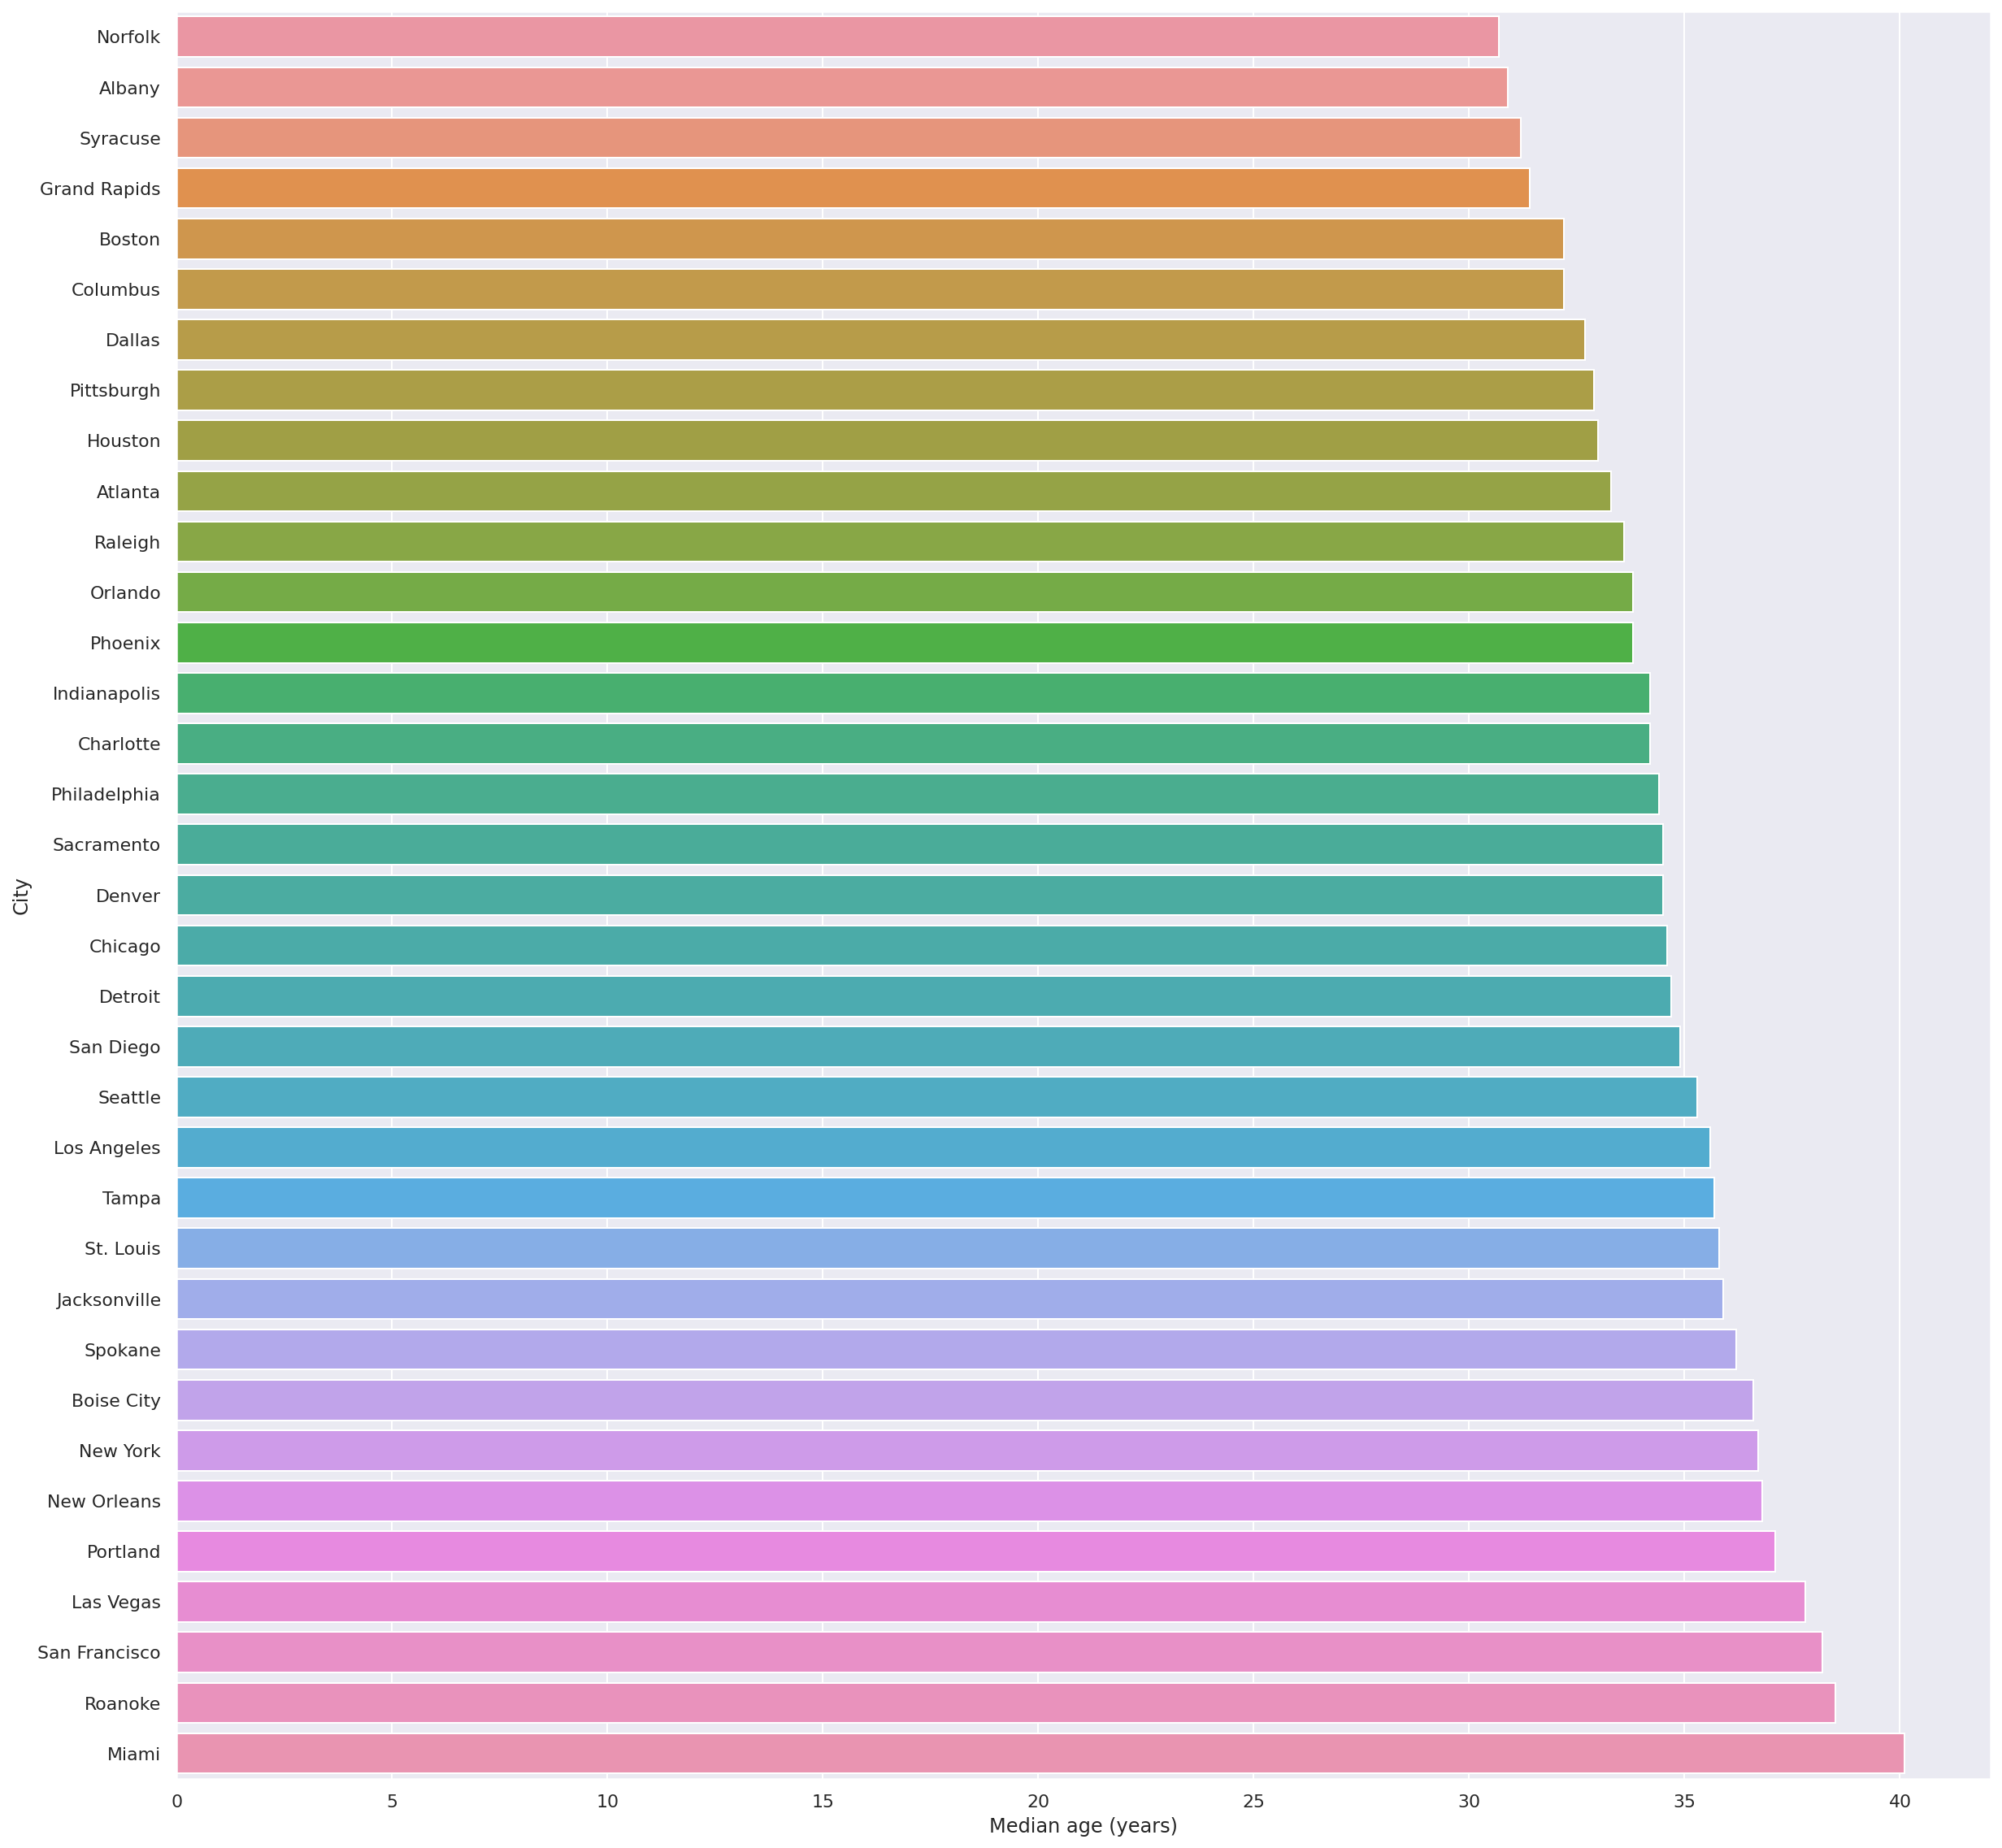

In [17]:
### City vs Median age
population = population.sort_values(by=['Median age (years)'])
sns.set(rc={'figure.figsize':(20,20)})
sns.barplot(x="Median age (years)", y="City", data=population, orient="h")
plt.show()


We are interested to see that cities with the highest median age and cities with the lowest median age, as these are the polarized values of our dataset. We see that the dataset has a good distribution.

Since the sales data we have are weekly, we would like to know the total sales for the whole year. Thus, we group the datasets by 'City'. The 'Average Price Per Unit' were summed as well in this process, we divide it by the number of occurence of each city to get the average price of avocado of the entire year.

In [18]:
salesSum2018= sales2018.groupby(by=['City']).sum()
salesSum2019= sales2019.groupby(by=['City']).sum()
salesSum2020= sales2020.groupby(by=['City']).sum()

salesSum2018['Average Price Per Unit'] = salesSum2018['Average Price Per Unit']/ len(sales2018[sales2018['City']=='Albany'])
salesSum2019['Average Price Per Unit'] = salesSum2019['Average Price Per Unit']/ len(sales2019[sales2019['City']=='Albany'])
salesSum2020['Average Price Per Unit'] = salesSum2020['Average Price Per Unit'] / len(sales2020[sales2020['City']=='Albany'])

salesSum2018.head()


,Average Price Per Unit,4046 Units,4225 Units,4770 Units,Total Sales ($)
City,,,,,
Albany,1.449592,497480.02,4692216.20,4819.64,6.745543e+06
Atlanta,1.282551,15428397.72,2166006.24,83442.63,1.754785e+07
Boise City,1.538469,2013969.60,258131.73,508002.04,3.428669e+06
Boston,1.496429,946726.24,27194280.82,96489.39,3.667767e+07
Charlotte,1.537959,3844462.17,4118411.20,297824.18,1.033604e+07


In [19]:
result2018 = pd.merge(left=salesSum2018, right=population, how="left", on=["City"])
result2018 = result2018.dropna()
result2018['Sales per 100K'] = result2018['Total Sales ($)'] / (result2018['Total population']) * 100000

result2019 = pd.merge(left=salesSum2019, right=population, how="left", on=["City"])
result2019 = result2019.dropna()
result2019['Sales per 100K'] = result2019['Total Sales ($)'] / (result2019['Total population']) * 100000

result2020 = pd.merge(left=salesSum2020, right=population, how="left", on=["City"])
result2020 = result2020.dropna()
result2020['Sales per 100K'] = result2020['Total Sales ($)'] / (result2020['Total population']) * 100000
result2020.head()

,City,Average Price Per Unit,4046 Units,4225 Units,4770 Units,Total Sales ($),State,Total population,Under 5 years,5 to 9 years,...,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over,Median age (years),Sex ratio (males per 100 females),Sales per 100K
0,Albany,1.346875,459280.28,5566694.14,9244.96,6.994118e+06,New York,97478,5622,4667,...,5059,5020,3925,3032,1885,1620,2139,30.9,88.3,7.175074e+06
1,Atlanta,1.207813,18429437.70,1608588.90,19030.56,1.837545e+07,Georgia,488800,26577,27559,...,26051,21839,18172,14829,9696,6821,6780,33.3,94.3,3.759298e+06
2,Boise City,1.416979,1822009.32,423510.81,74476.34,2.652730e+06,Idaho,226115,12985,13588,...,14088,13080,11677,7313,4825,3629,4054,36.6,99.3,1.173177e+06
3,Boston,1.603750,972456.99,24013739.81,30757.24,3.386215e+07,Massachusetts,684379,34485,28298,...,36690,31914,25139,20019,13703,9116,10884,32.2,92.3,4.947865e+06
4,Charlotte,1.339271,7650208.66,3079177.77,224453.13,1.226594e+07,North Carolina,857425,57891,56536,...,49587,41950,31485,23228,13825,9771,9431,34.2,92.5,1.430556e+06


We merge dataframe 'population' with 'salesSum' for 2018,2019,and 2020. We use 'City' as the key. Since every cities have different number of people, we think it is best to capture the sales data per capita. We then graph a bargraph using median age vs sales per 100k people. We hope to see an uneven distribution among the sales in each cities.

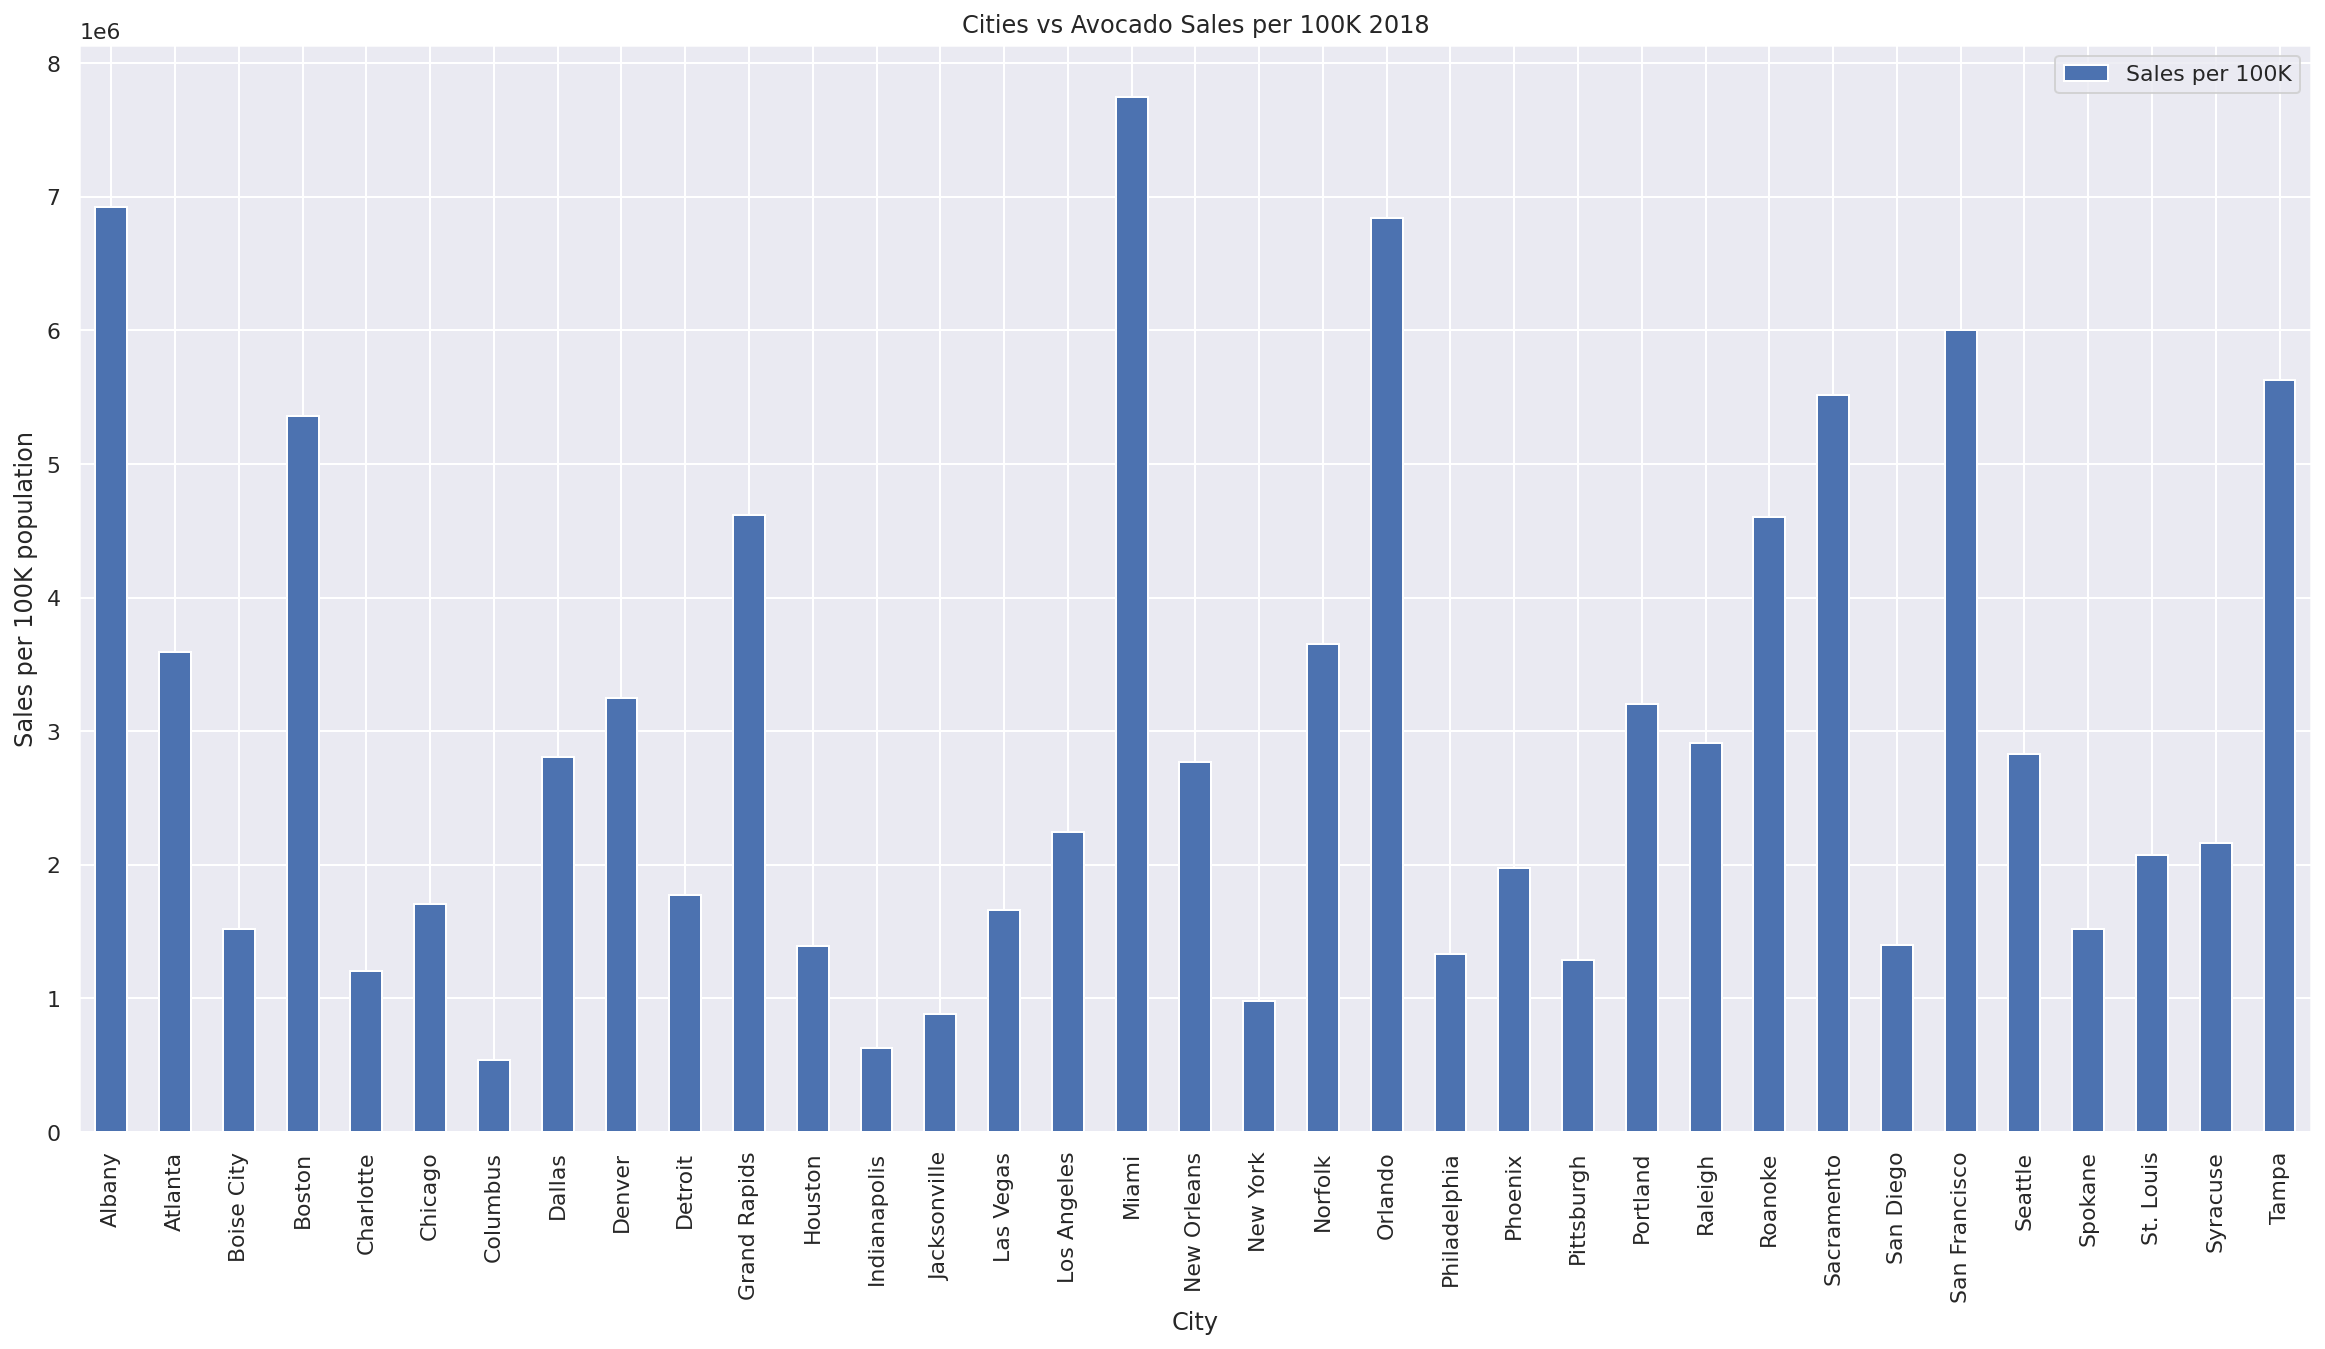

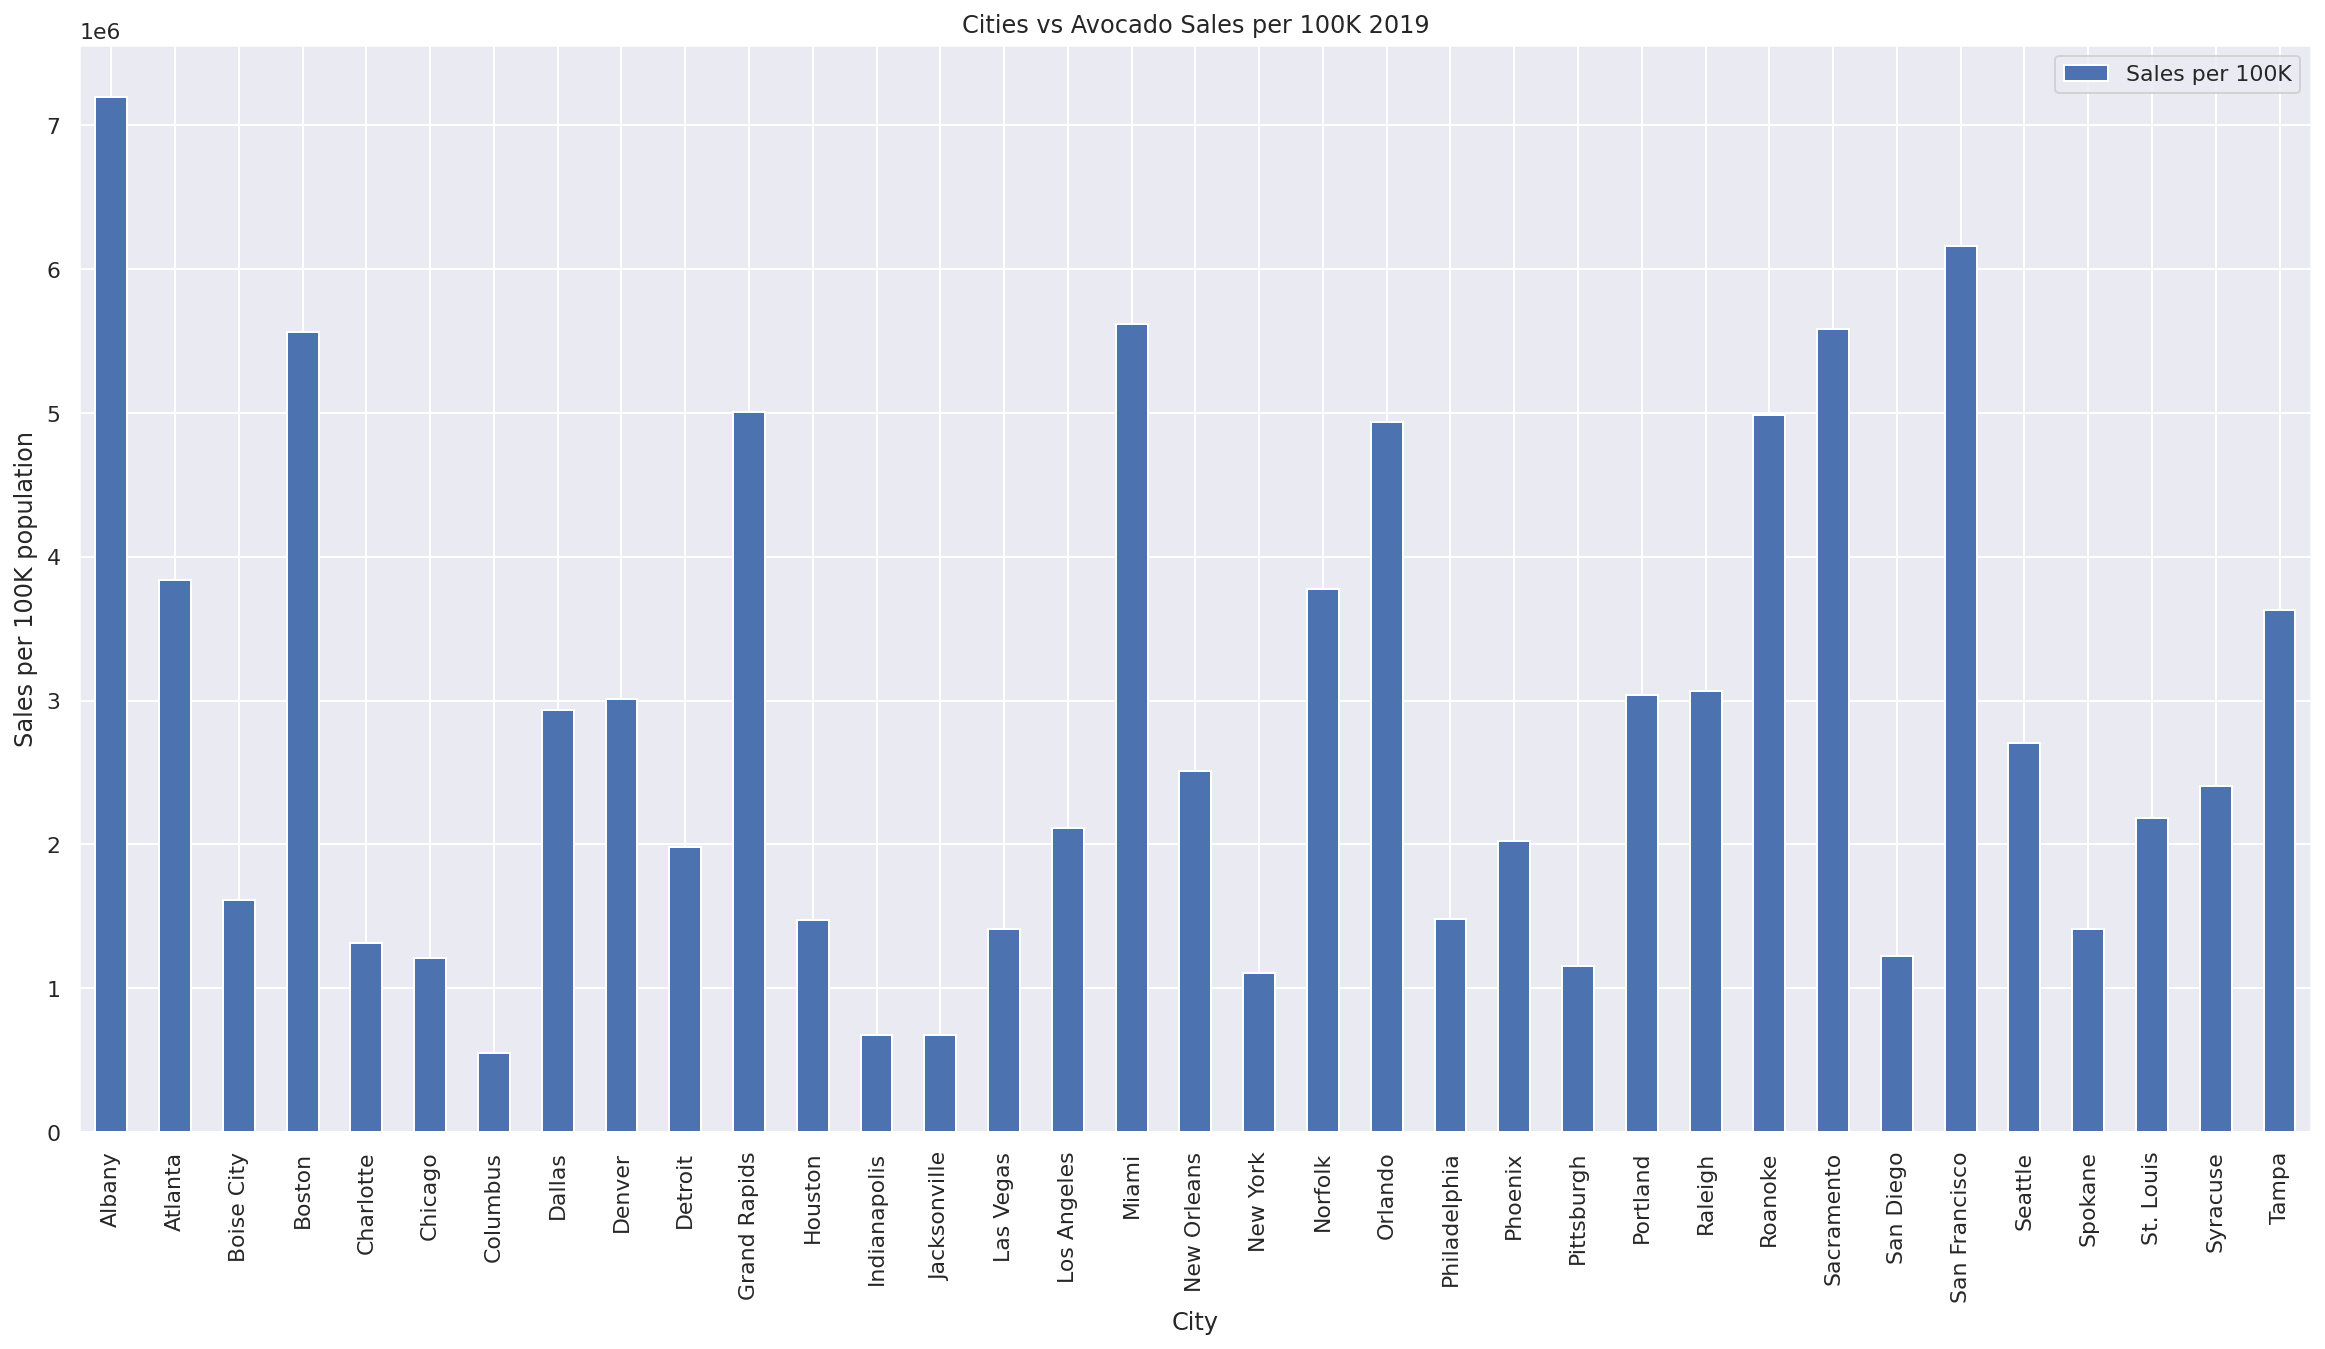

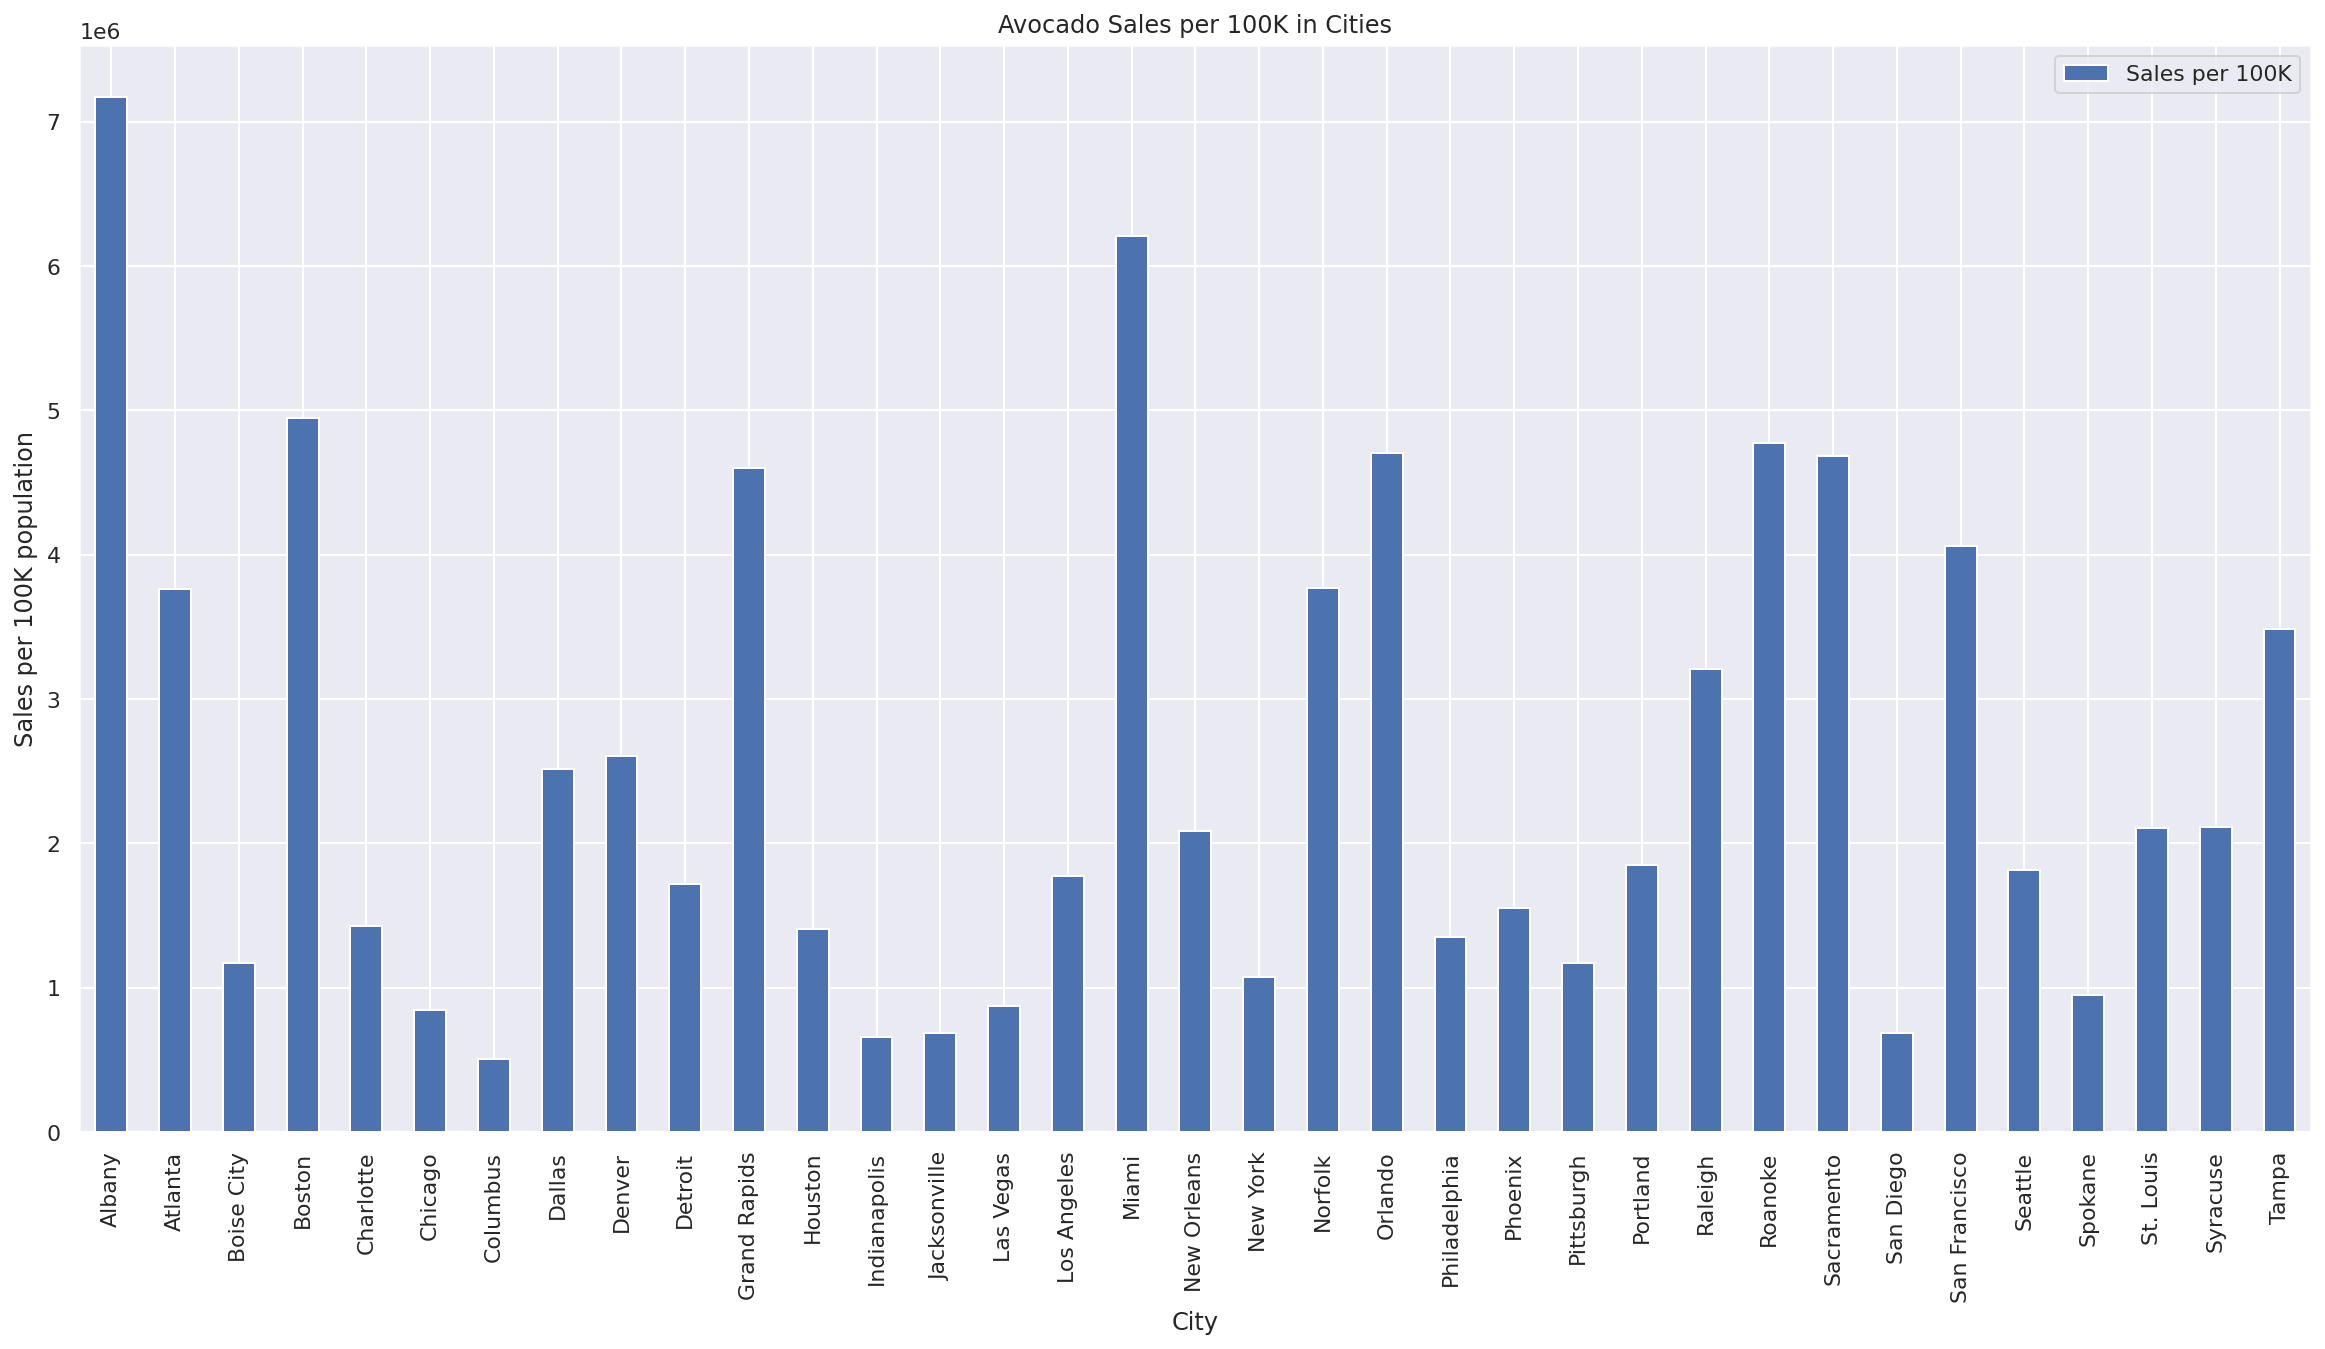

In [20]:
### BarGraph City vs Sales per 100K in year
result2018.plot(
    y = 'Sales per 100K',
    x = 'City',
    kind='bar',
    figsize=(20,10),
    title='Cities vs Avocado Sales per 100K 2018'
);
plt.ylabel("Sales per 100K population")
plt.show()

result2019.plot(
    y = 'Sales per 100K',
    x = 'City',
    kind='bar',
    figsize=(20,10),
    title='Cities vs Avocado Sales per 100K 2019'
);
plt.ylabel("Sales per 100K population")
plt.show()

result2020.plot(
    y = 'Sales per 100K',
    x = 'City',
    kind='bar',
    figsize=(20,10),
    title='Avocado Sales per 100K in Cities'
);
plt.ylabel("Sales per 100K population")
plt.show()

We confirmed that there is variability in sales from different cities, we would like to see the relationship between sales and age of the population. As we see throughout the years, the majority of the cities have consistant sales of avocado per 100 thousands population. There are few cities that have noticible changes like San Francisco, where from 2018 to 2019, there is increase in sales, but the following year, there is a dramatic decrease. Majority of the cities that we are researching seem to have minimal sales of avocadoes, averaging around .5-2 on our y-axis, and that the data might be skewed because of the large data outliers.


Scatterplot can visually represent the relationship of age and avocado sales of each cities. Below we create a scatterplot graph of Median age vs Sales per 100K. We hope to see that there exist some plots on the top left corner (low median age and high sales volume) and bottom right corner (high median age and low sales volume). 

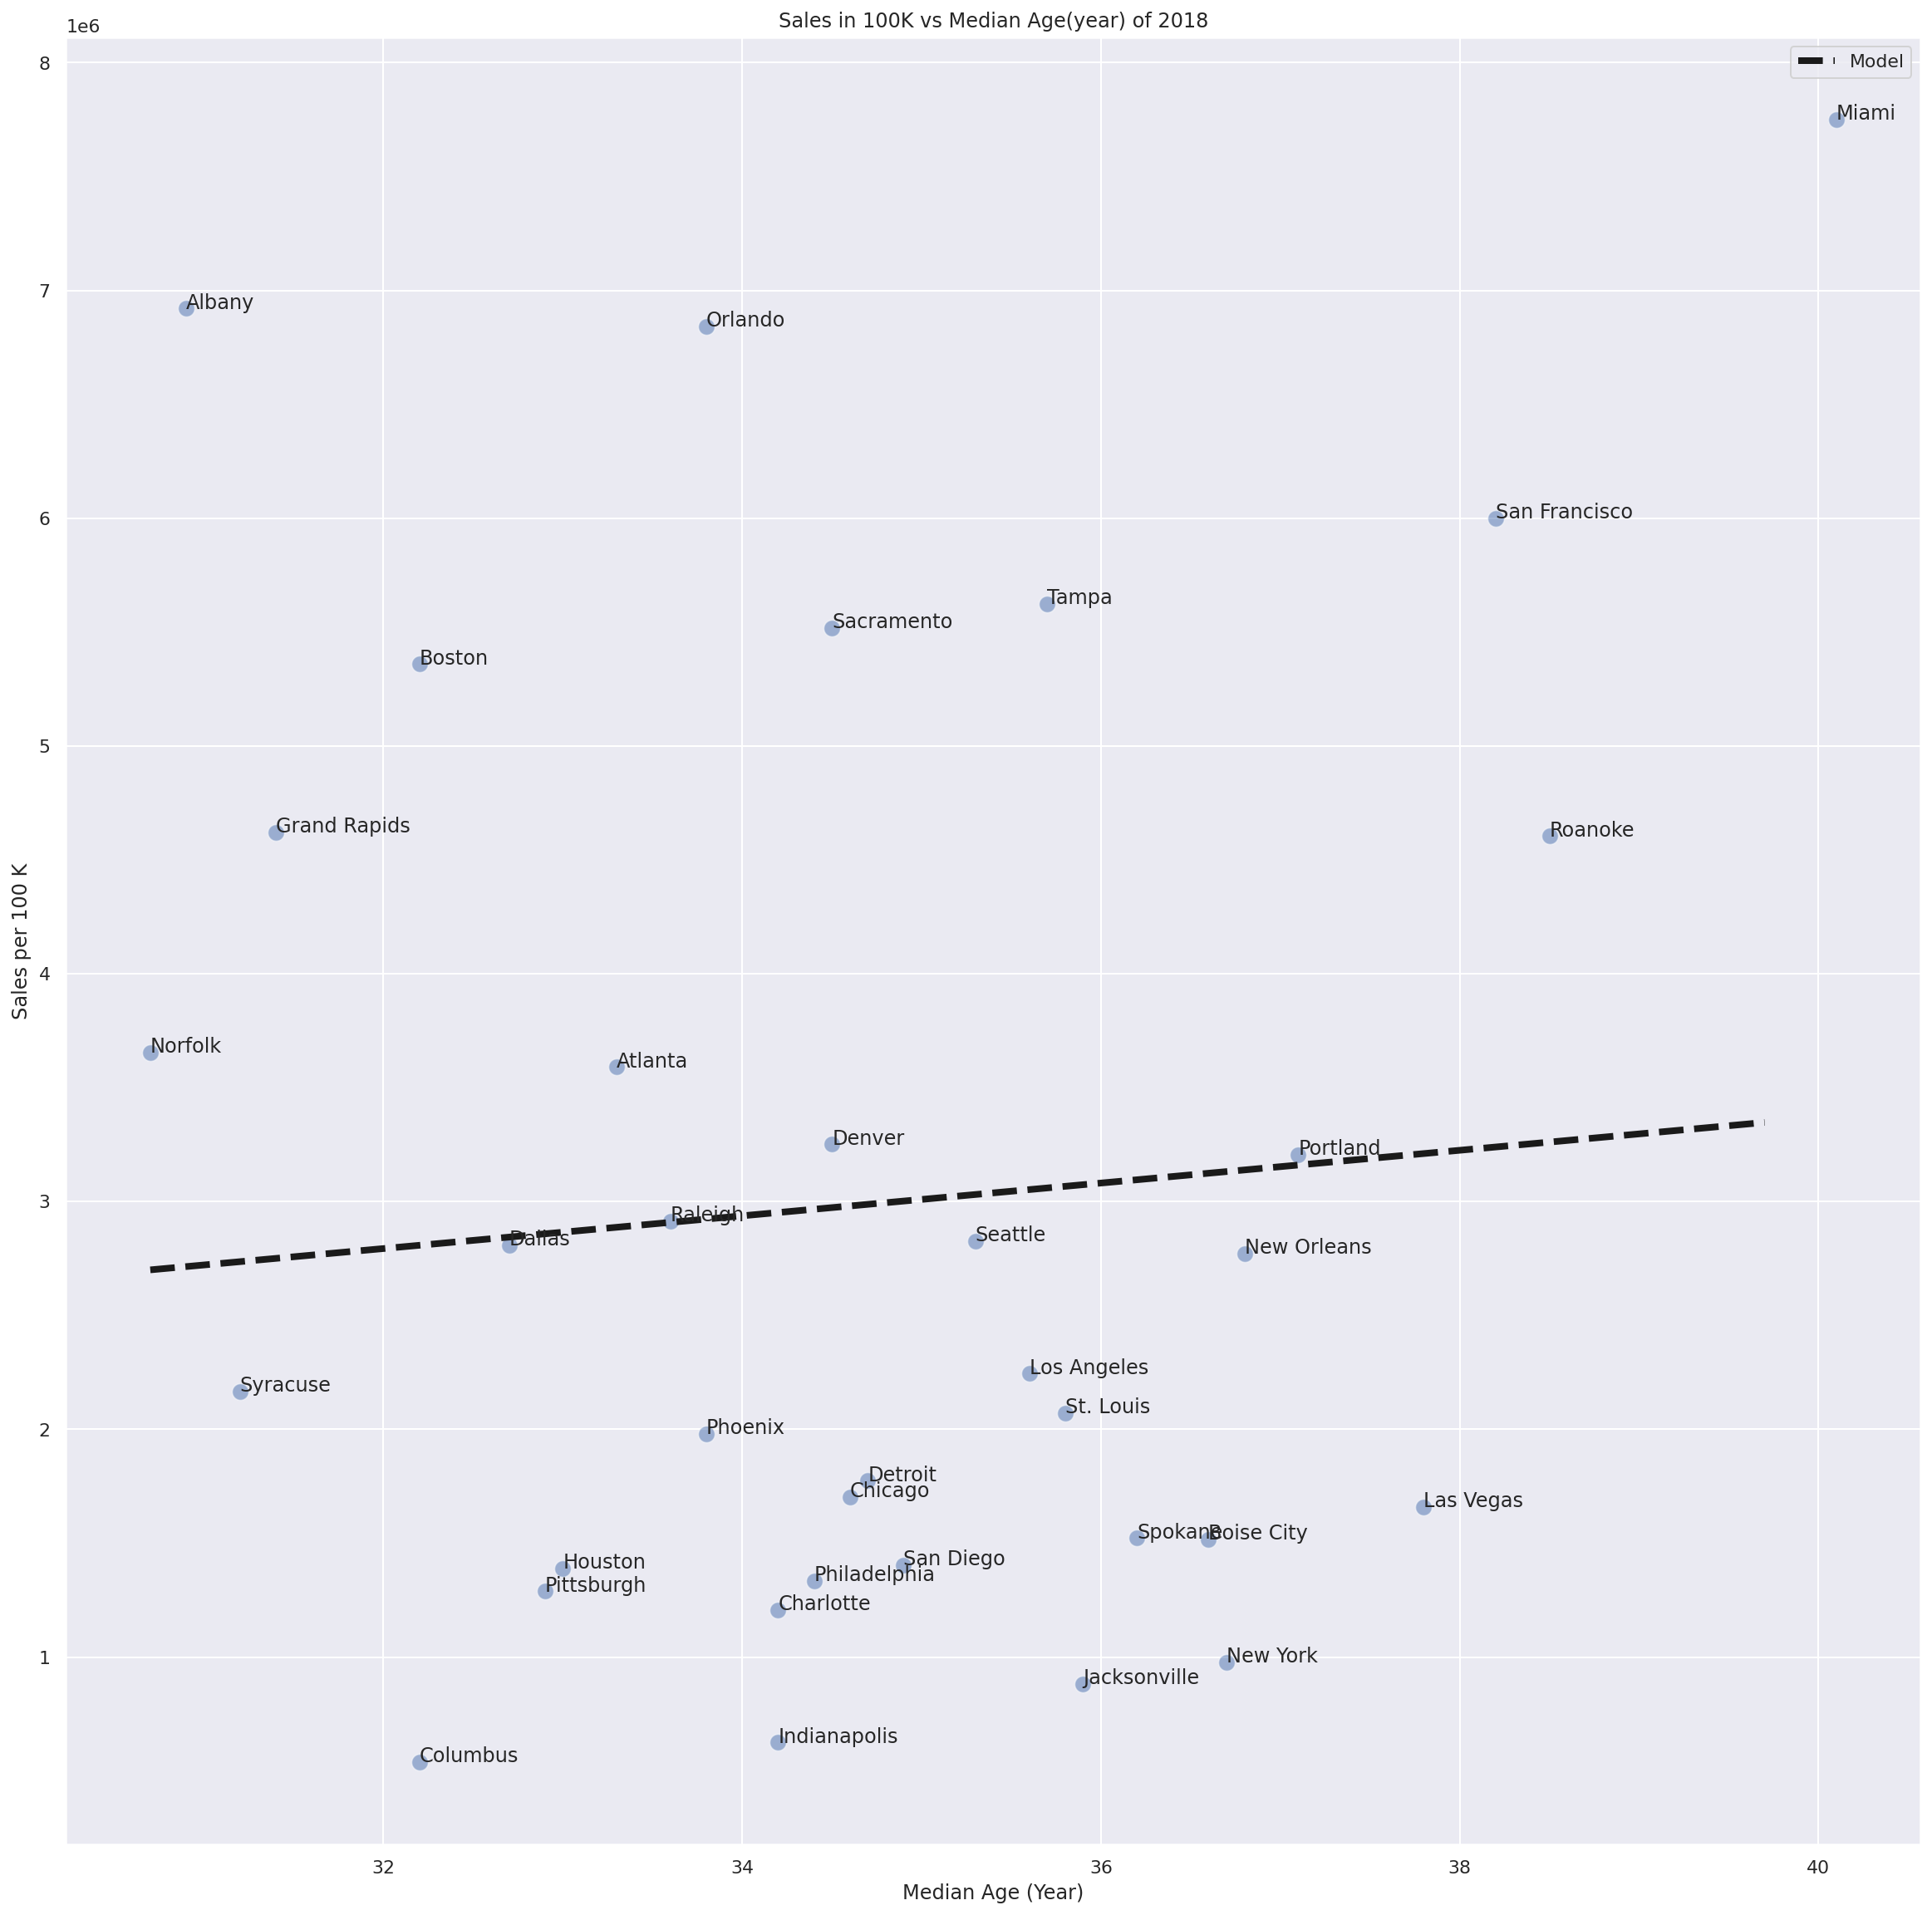

                            OLS Regression Results                            
Dep. Variable:       SalesPerHundredK   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.2213
Date:                Thu, 25 Feb 2021   Prob (F-statistic):              0.641
Time:                        21:30:37   Log-Likelihood:                -556.53
No. Observations:                  35   AIC:                             1117.
Df Residuals:                      33   BIC:                             1120.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.925e+05   5.31e+06      0.093      0.9

In [21]:
## ScatterGraph Median vs Sales/Population in year
df2018 = result2018
df2018 = df2018.rename(columns={'Sales per 100K': "SalesPerHundredK", 'Median age (years)':'MedianAge'})
outcome, predictors = patsy.dmatrices('SalesPerHundredK ~ MedianAge', df2018)
# Now use statsmodels to intialize an OLS linear model
mod_log = sm.OLS(outcome, predictors)
# fit the model
res_log = mod_log.fit()


sns.scatterplot(x='MedianAge', y='SalesPerHundredK', alpha=0.5, data=df2018, s=100)
# Generate and plot the model fit line
xs = np.arange(df2018['MedianAge'].min(), df2018['MedianAge'].max())
ys =  7.191e+04 * xs + 4.925e+05
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.title("Sales in 100K vs Median Age(year) of 2018")
plt.xlabel('Median Age (Year)')
plt.ylabel('Sales per 100 K')
plt.legend();

X = df2018["MedianAge"]
Y = df2018["SalesPerHundredK"]
annotations= df2018["City"]
for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))
    
plt.show()
print(res_log.summary())

- From the scatter plot, we interpret that majority of the cities from our data around the age of 35 and estimate to have sales of avocados per 100 thousands population of about 2-3 millions in 2018.


- P-value 0.641 shows that Sales per 100K and Median age (years) have no significance. From the given graph, we see that the for the year of 2018, there is a positive correlation between Sales per 100k and Median Age.

The scatterplot above has Median Age on the X-axis and Sales per 100K on the Y-axis (in 1E6 dollars). The plots on the graphs look quite evenly distributed. We will graph 2019 and 2020 and make comparisons.

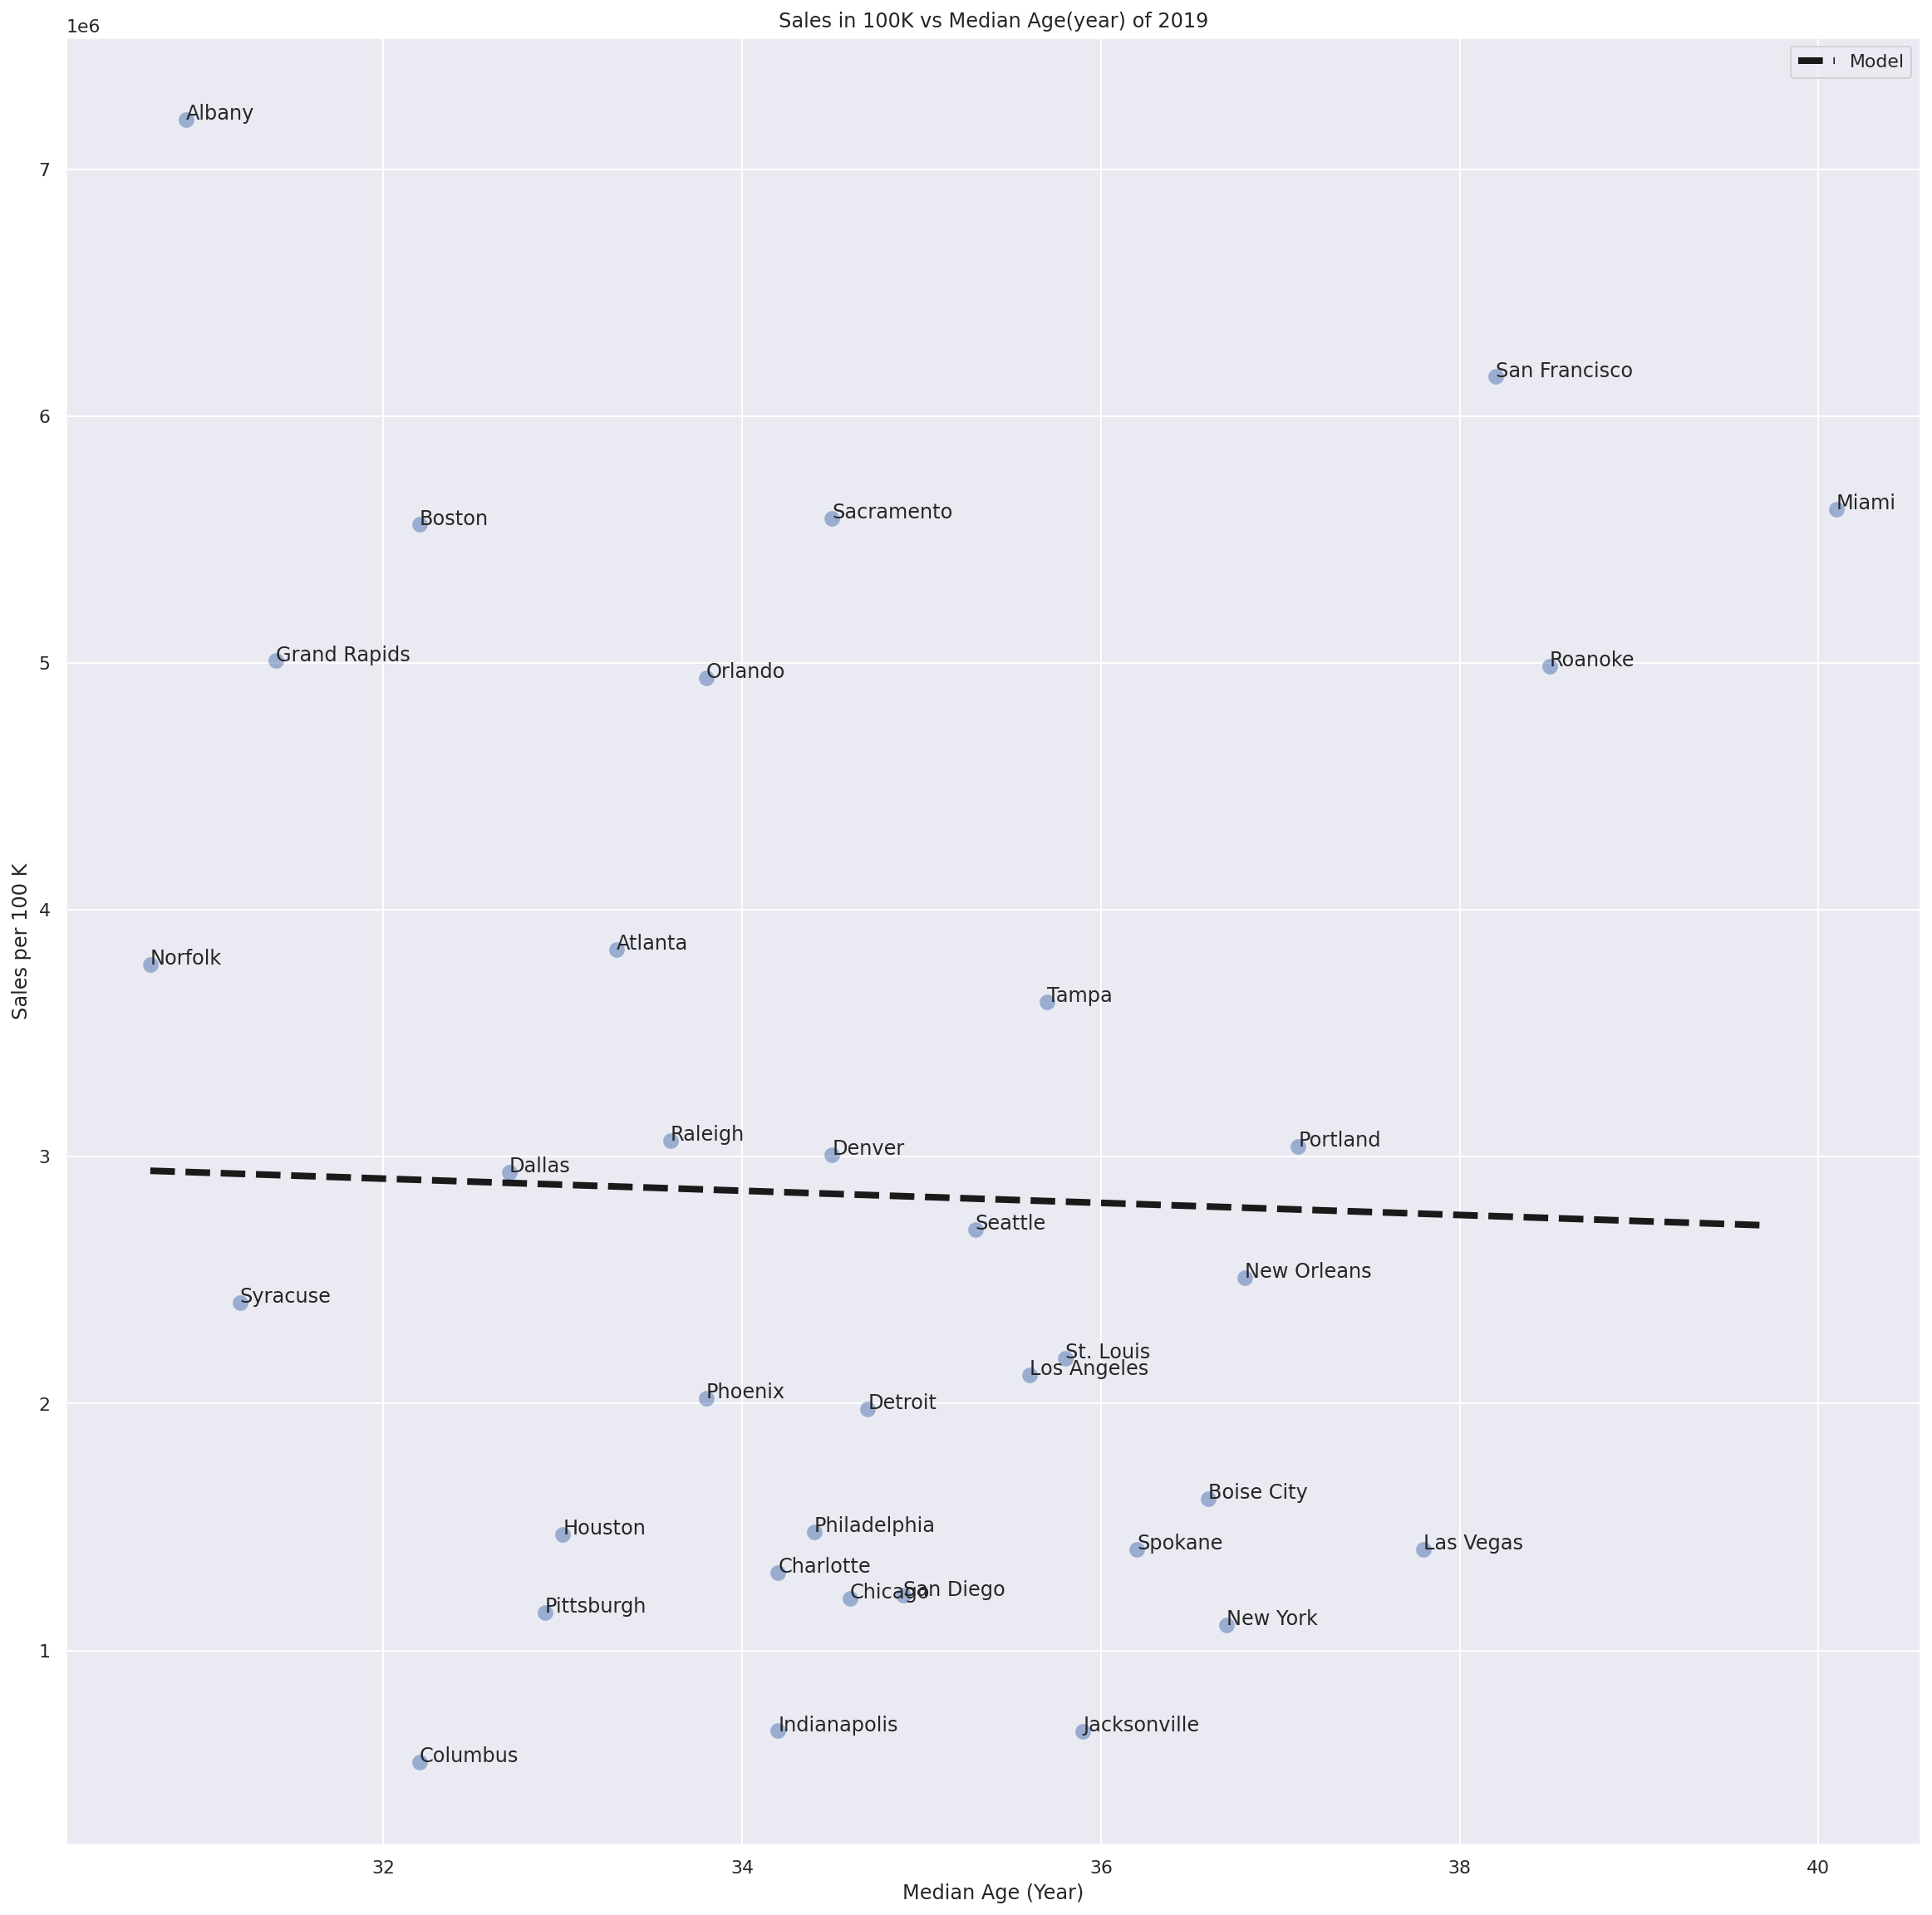

                            OLS Regression Results                            
Dep. Variable:       SalesPerHundredK   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                   0.03134
Date:                Thu, 25 Feb 2021   Prob (F-statistic):              0.861
Time:                        21:30:38   Log-Likelihood:                -553.09
No. Observations:                  35   AIC:                             1110.
Df Residuals:                      33   BIC:                             1113.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.696e+06   4.82e+06      0.767      0.4

In [22]:
## ScatterGraph Median vs Sales/Population in year
df2019 = result2019
df2019 = df2019.rename(columns={'Sales per 100K': "SalesPerHundredK", 'Median age (years)':'MedianAge'})
outcome, predictors = patsy.dmatrices('SalesPerHundredK ~ MedianAge', df2019)
# Now use statsmodels to intialize an OLS linear model
mod_log = sm.OLS(outcome, predictors)
# fit the model
res_log = mod_log.fit()



sns.scatterplot(x='MedianAge', y='SalesPerHundredK', alpha=0.5, data=df2019, s=100)
# Generate and plot the model fit line
xs = np.arange(df2019['MedianAge'].min(), df2019['MedianAge'].max())
ys =  -2.453e+04 * xs + 3.696e+06
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.title("Sales in 100K vs Median Age(year) of 2019")
plt.xlabel('Median Age (Year)')
plt.ylabel('Sales per 100 K')
plt.legend();

X = df2019["MedianAge"]
Y = df2019["SalesPerHundredK"]
annotations= df2019["City"]
for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))
    
plt.show()
print(res_log.summary())

- From the scatter plot, most data points are near the bottom of the middle of the graph. We interpret that the majority of the cities from our data around the age of 34 and 36 with estimaion that have sales of avocados per 100 thousands population of about 1-2 millions in 2019.


- P-value 0.861 shows that Sales per 100K and Median age (years) have no significance.

From the 2020 scatterplot, we did observe more plots on the top left corner compared to the bottom right corner. However, that could be skewed because of Miami (has the highest median age). From the scatterplot, we do not see any linear lines and thus we do not have a positive/negative correlation

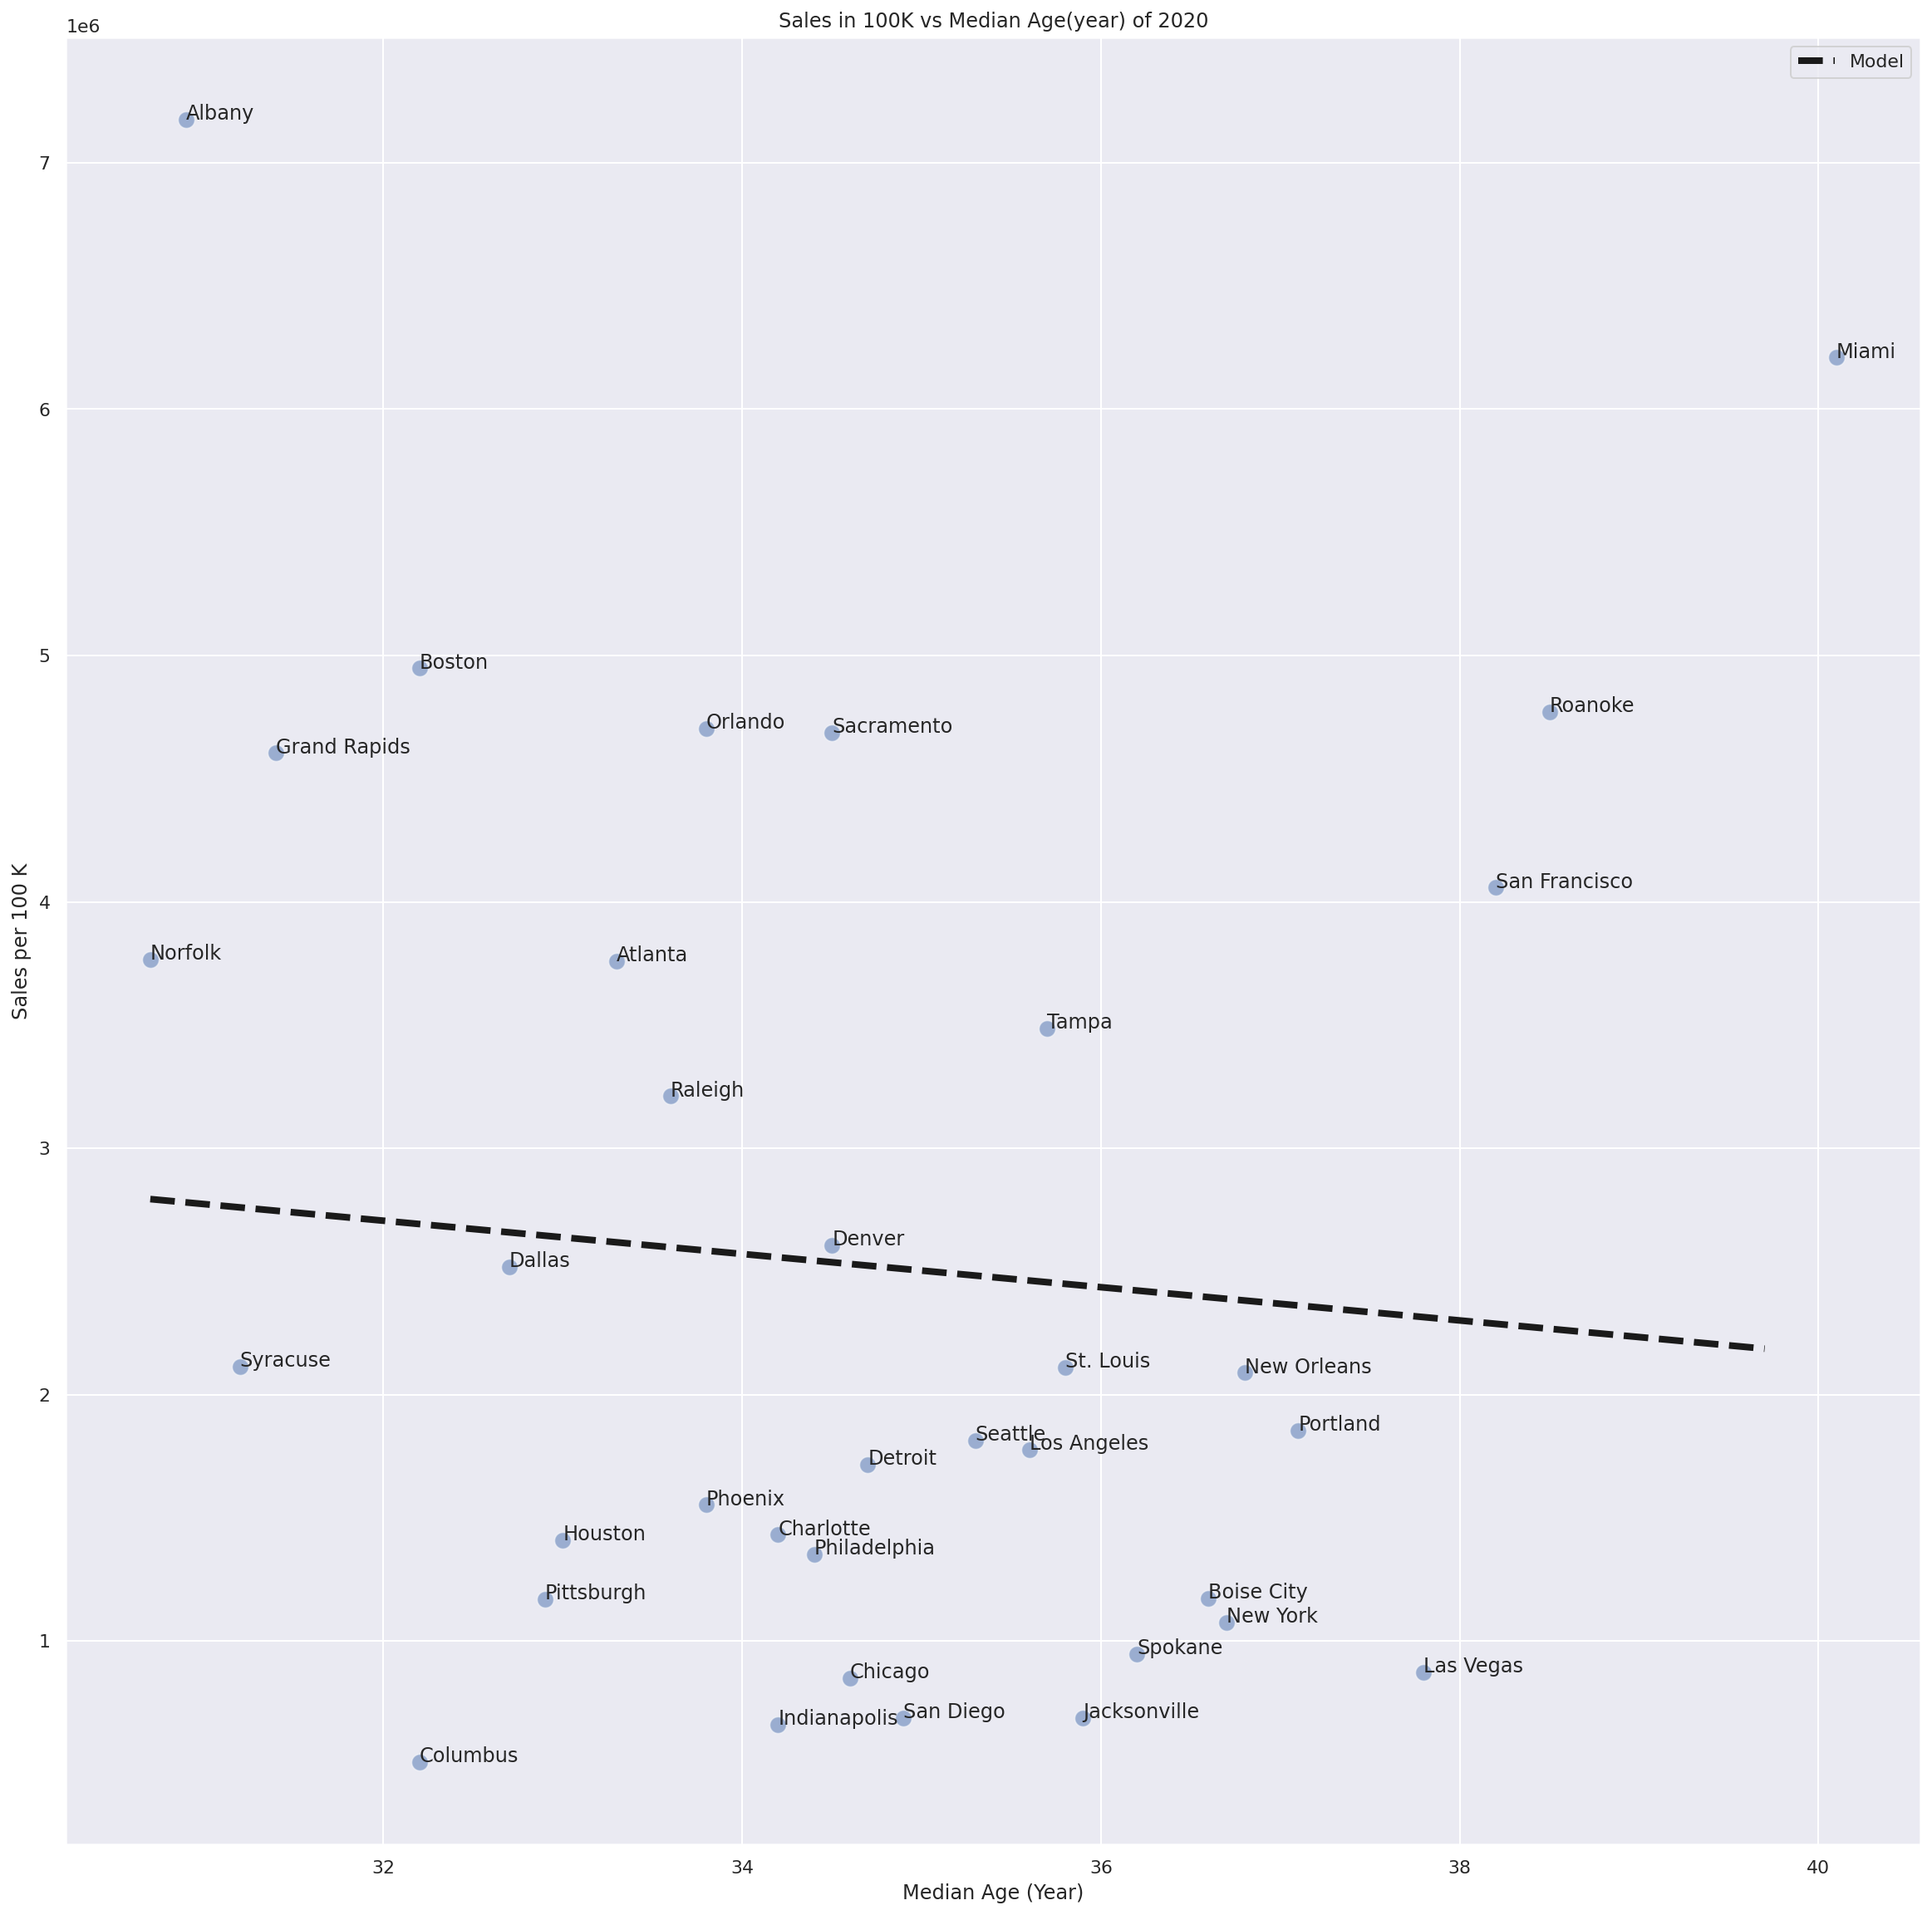

                            OLS Regression Results                            
Dep. Variable:       SalesPerHundredK   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.2548
Date:                Thu, 25 Feb 2021   Prob (F-statistic):              0.617
Time:                        21:30:38   Log-Likelihood:                -551.83
No. Observations:                  35   AIC:                             1108.
Df Residuals:                      33   BIC:                             1111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.865e+06   4.65e+06      1.047      0.3

In [23]:
## ScatterGraph Median vs Sales/Population in year

df2020 = result2020
df2020 = df2020.rename(columns={'Sales per 100K': "SalesPerHundredK", 'Median age (years)':'MedianAge'})
outcome, predictors = patsy.dmatrices('SalesPerHundredK ~ MedianAge', df2020)
# Now use statsmodels to intialize an OLS linear model
mod_log = sm.OLS(outcome, predictors)
# fit the model
res_log = mod_log.fit()

sns.scatterplot(x='MedianAge', y='SalesPerHundredK', alpha=0.5, data=df2020, s=100)

# Generate and plot the model fit line
xs = np.arange(df2020['MedianAge'].min(), df2020['MedianAge'].max())
ys = -6.748e+04 * xs + 4.865e+06
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.title("Sales in 100K vs Median Age(year) of 2020")
plt.xlabel('Median Age (Year)')
plt.ylabel('Sales per 100 K')
plt.legend();

X = df2020["MedianAge"]
Y = df2020["SalesPerHundredK"]
annotations= df2020["City"]
for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))
    
plt.show()
print(res_log.summary())

- From the scatter plot, most data points are near the bottom of the middle of the graph. We interpret that the majority of the cities from our data around the age of 34 and 37 with estimaion that have sales of avocados per 100 thousands population of about 500 thousands to 2 millions in 2020.


- P-value 0.617 shows that Sales per 100K  and Median age (years) have no significance.